In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# 화면을 선명하게 설정
%config InlineBackend.figure_format = 'retina'

# 한글 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우즈
# plt.rc('font', family='AppleGothic')  # mac
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)    # 축의 - 깨짐 방지

# warning(경고) 안보이게 설정
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<b><font color="red" size="6"> 12장. 데이터 시각화 </font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
 * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
 * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리
 
 ## 2절. seaborn
    - 공식사이트 : https://seaborn.pydata.org
    - seaborn API : https://seaborn.pydata.org/api.html
    
- seaborn으로 그래프 그리기 위해 다음 단계를 따릅니다.
    1. 데이터 준비
    2. 미적 속성 설정(한글설정을 다시)
    3. 함수를 이용해서 그래프 그리기(x축 기준으로 수치형, 범주형, 쌍관계, 밀도그래프, 회귀그래프, 다중그래프)
    4. 그래프 출력(show), 저장(savefig)

## 2.1 데이터 준비하기
- iris, titanic

In [5]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.isna().sum() # 결측치 확인

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.species.unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
iris['species'].value_counts() # 범주별 데이터 갯수 (안전)
iris.groupby('species')['sepal_length'].count() # 결측치가 포함되어 있을 수도 있음

species
setosa        50
versicolor    50
virginica     50
Name: sepal_length, dtype: int64

#### titanic 데이터 로드

In [13]:
# PassengerId: 각 승객에게 주어진 고유 ID 번호
# Survived: 승객이 생존(1)했는지 사망(0)했는지 여부
# Pclass: 선실 등급(1:1등급, 2:2등급, 3:3등급)
# Name: 이름
# Sex: 승객의 성별
# Age: 승객의 나이
# SibSp: 형제자매/배우자의 수
# Parch: 부모/자녀의 수
# Ticket: 티켓 번호
# Fare: 티켓에 대해 지불한 금액
# Cabin: 객실 카테고리
# Embarked: 승객이 탑승한 항구(C = Cherbourg, Q = Queenstown, S = Southampton)
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic.shape

(891, 15)

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2 미적 속성 설정하기(style, context, palette, figsize..)
### 1) 그래프 style 설정
- 교안51page : https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style
- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

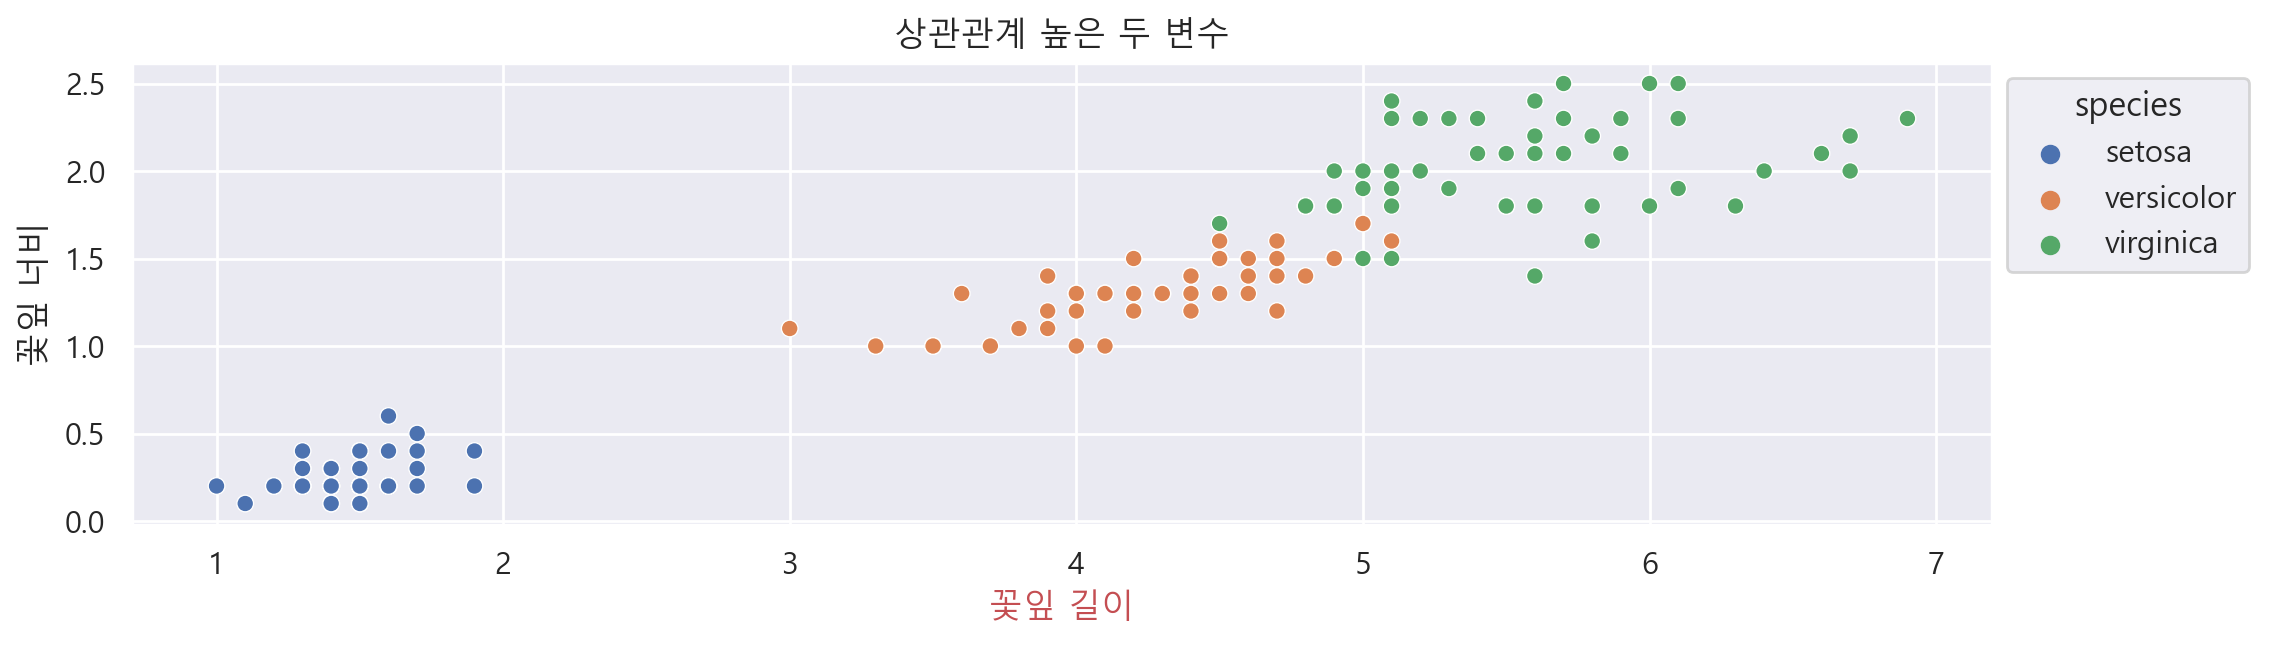

In [24]:
plt.figure(figsize=(12, 3))
#.set(style='white') 한번설정하면 쭉 이게 기본값이됨
sns.set(style='darkgrid') # white, whitegrid, dark, darkgrid, ticks 

# 한글 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우즈
# plt.rc('font', family='AppleGothic')  # mac
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)    # 축의 - 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species') # hue : 기준값
ax.set(title='상관관계 높은 두 변수',
       ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', c='r')

# 범례
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

### 2) 컨텍스트 지정(비율)

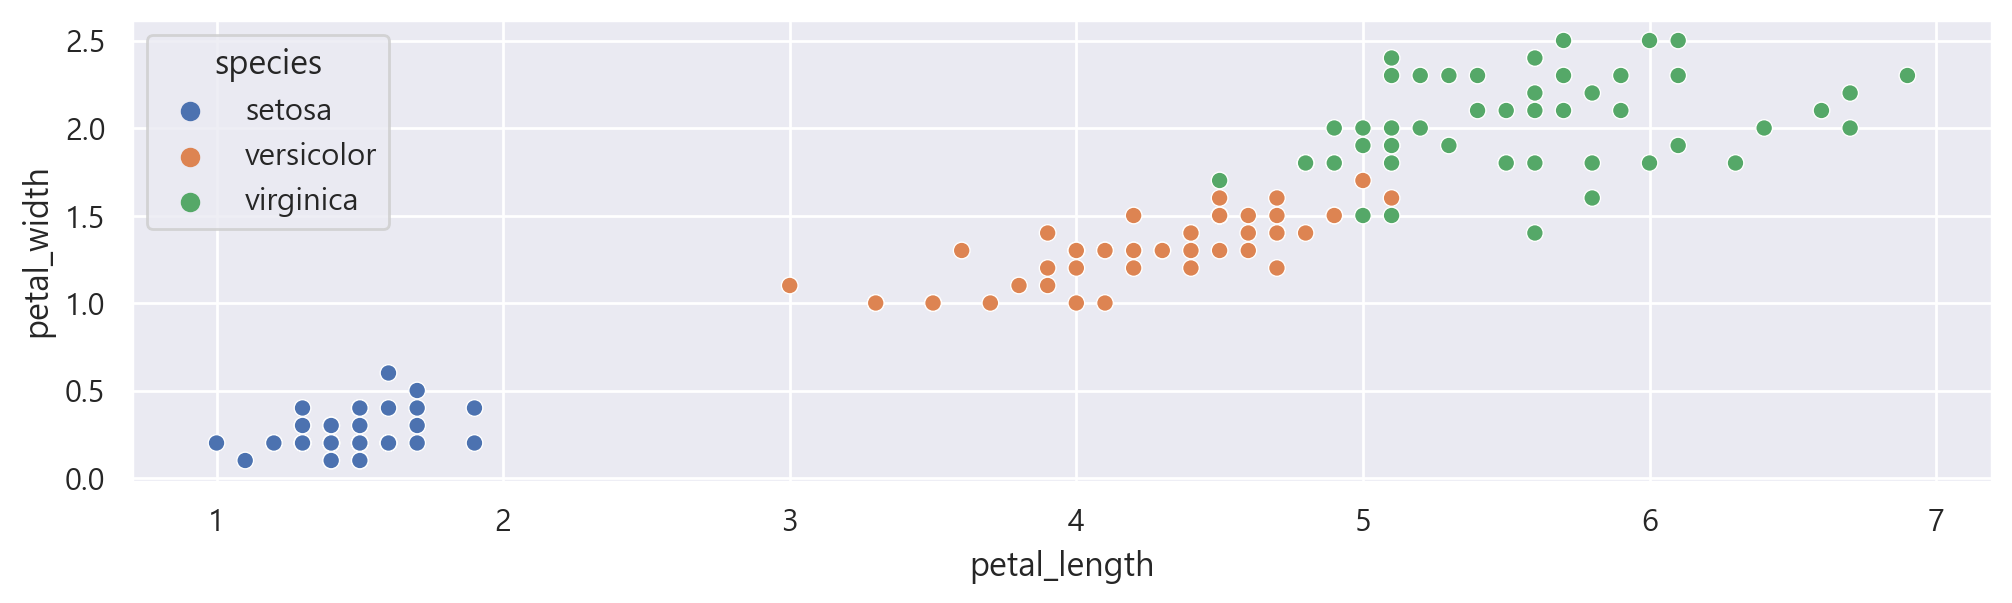

In [26]:
plt.figure(figsize=(12, 3))
# notebook(1.0), paper(0.8), talk(1.3), poster(1.8)
#sns.set(context='notebook')  
sns.set_context('notebook')
# 한글 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우즈
plt.rc('axes', unicode_minus=False)    # 축의 - 깨짐 방지

sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species') # hue : 기준값

plt.show()

### 3) 컬러 팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

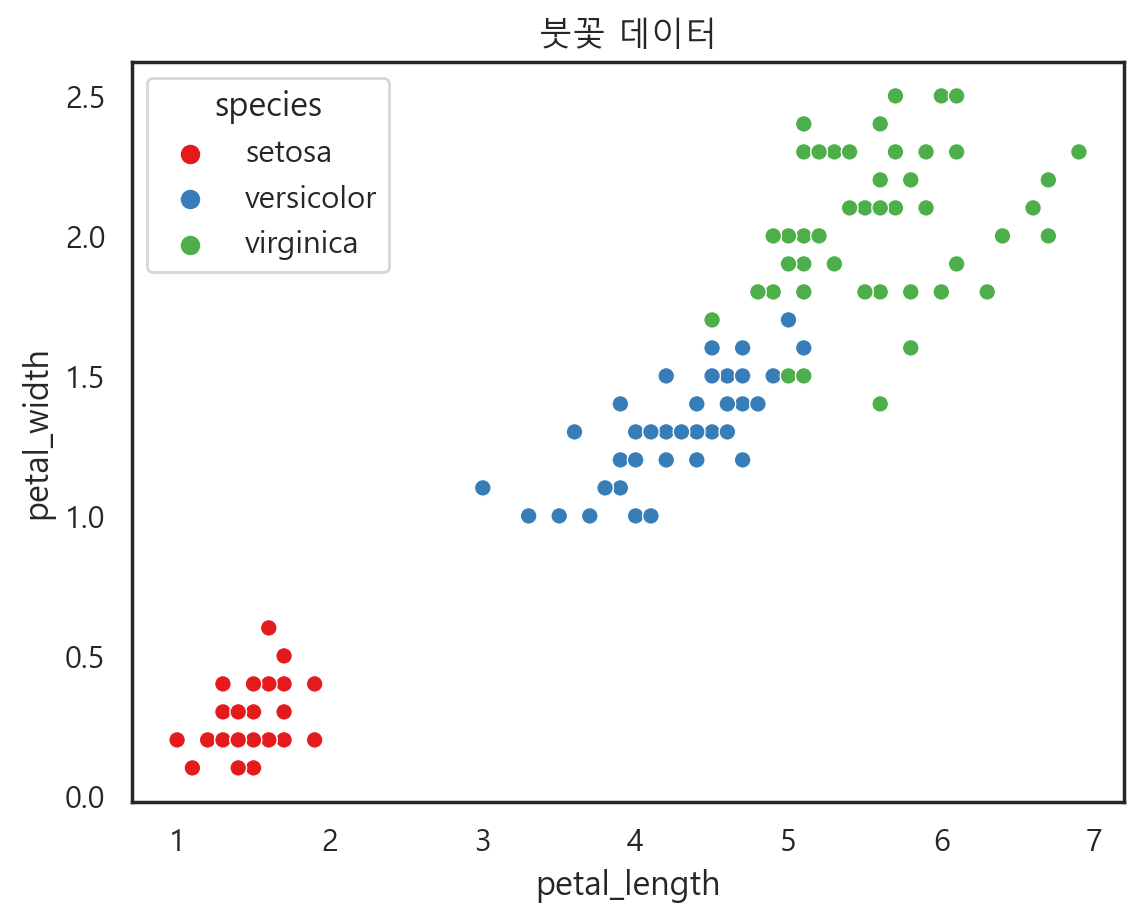

In [29]:
# 기본 미적 속성 설정
#sns.set(palette='Pastel1', style='white', context='notebook')
sns.set(palette='Set1', style='white', context='notebook')
# 한글 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우즈
plt.rc('axes', unicode_minus=False)    # 축의 - 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width',
                hue='species', palette='Set1')

ax.set_title('붓꽃 데이터')
plt.show()

In [33]:
# 기본 미적 속성 설정
sns.set(palette='Dark2',
        style='whitegrid',
        context='notebook',
        rc={'figure.figsize': (10, 3)})
# 한글 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우즈
plt.rc('axes', unicode_minus=False)    # 축의 - 깨짐 방지

## 2.3 seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
    - x축이 수치형 데이터
  (ex) scatterplot(점그래프), lineplot(선그래프) => relplot(서브플롯)

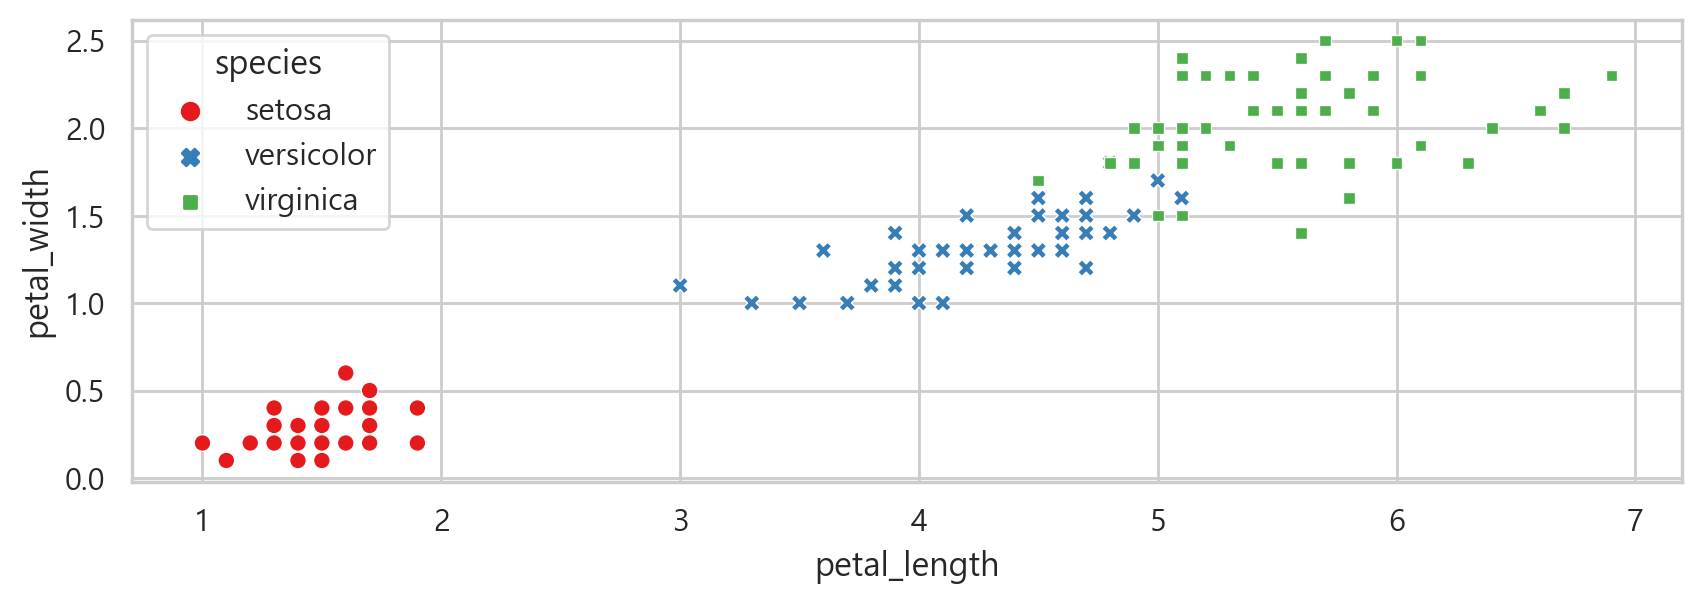

In [34]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
                palette='Set1', style='species')
        # species 별로 지정했기 때문에 색상과 스타일이 다른 scatterplot(선점도)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='petal_length', ylabel='petal_width'>

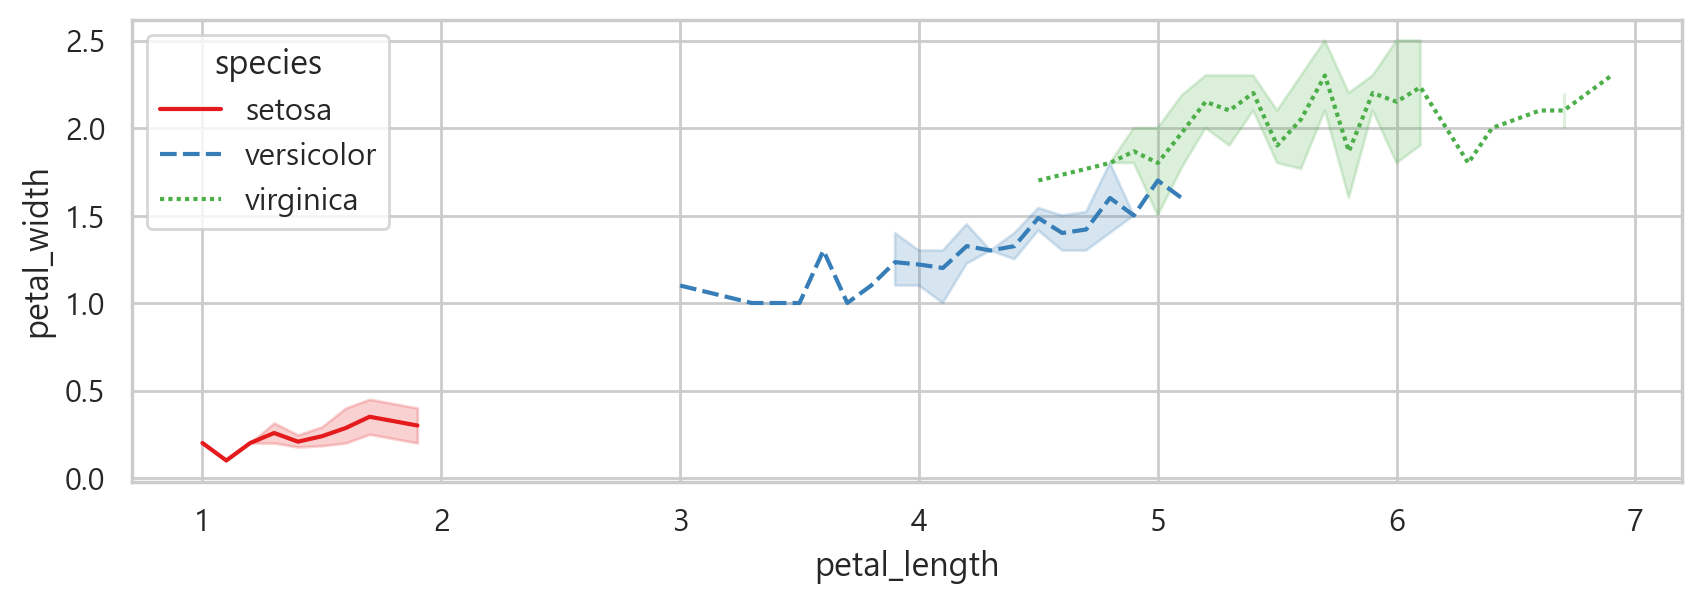

In [38]:
# 종별 lineplot
# lineplot의 음영 : 95% 신뢰구간
sns.lineplot(data=iris, x='petal_length', y='petal_width',
             hue='species', palette='Set1', style='species')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

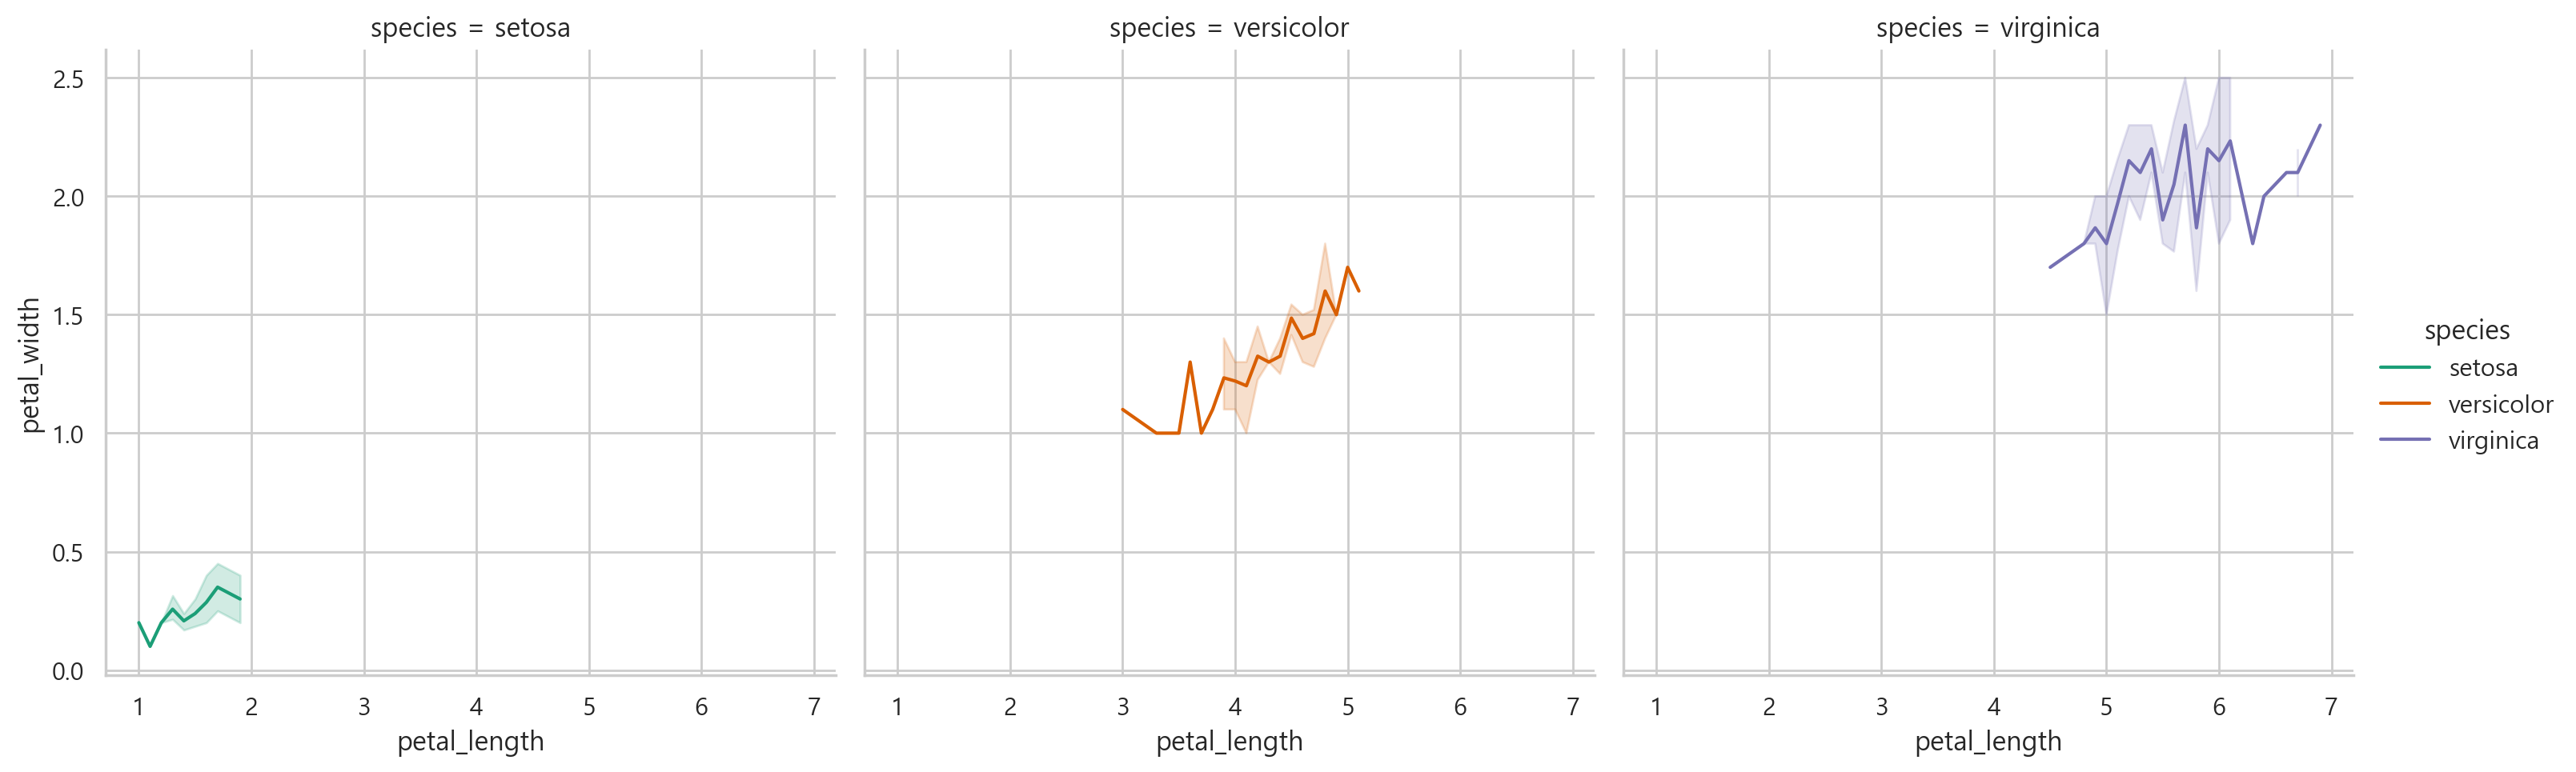

In [42]:
# 종별 lineplot을 서브플롯으로
sns.relplot(data=iris, x='petal_length', y='petal_width',
             hue='species',
             kind='line', # kind='scatter'(기본값) 카인드에는 line,scatter만 올수 있음
             col='species', # species별 서브플롯
             #col_wrap=2, # 한줄에 표현될 서브플롯 수
             )
plt.show()

#### 경고메시지 제거

In [47]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

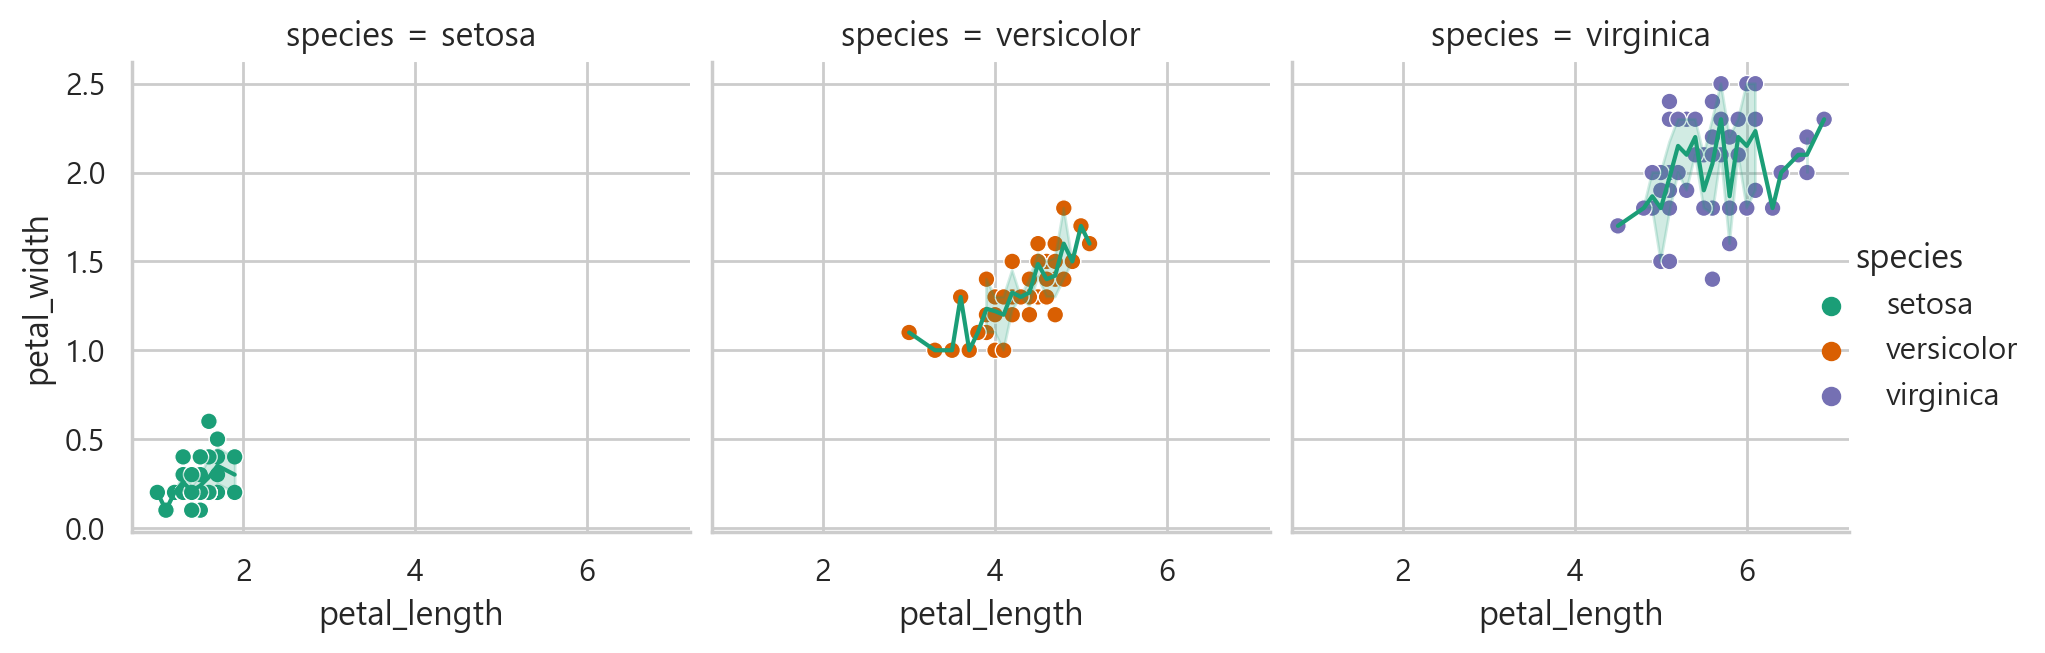

In [48]:
# line과 scatter를 서브플롯으로 겹쳐서
g = sns.relplot(data=iris, x='petal_length', y='petal_width',
             hue='species',
             #kind='line', # kind='scatter'(기본값) 카인드에는 line,scatter만 올수 있음
             col='species', # species별 서브플롯
             #col_wrap=2, # 한줄에 표현될 서브플롯 수
             )
# g그래프에 line 플롯을 추가
g.map_dataframe(sns.lineplot,x='petal_length', y='petal_width')
# 크기조정 : 서브플롯함수에서는 내부적으로 figure 새로 만들기 때문에 figsize 무시
g.fig.set_size_inches(10,3)
plt.show()

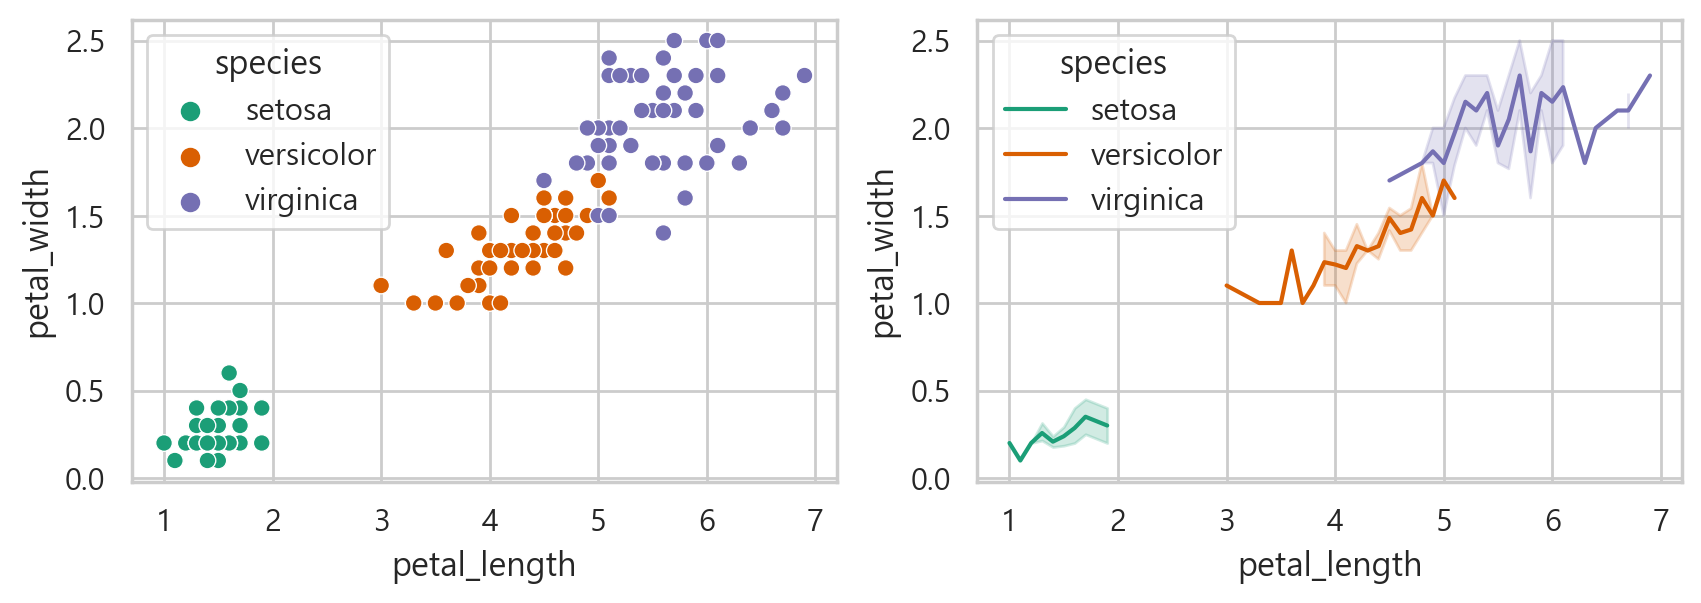

In [51]:
# ax[0]에는 scatter, ax[1] lineplot
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species',
                ax=ax[0])
sns.lineplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species',
                ax=ax[1])
plt.show()

### 2) 범주형 그래프
    - x축이 범주형 데이터
  (ex) stripplot(무작위 흩뿌림), swarmplot(겹치지않는산점도)
       barplot, barhplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line)
       countplot(count는 x의 빈도수가 높이)
       boxplot, violinplot, boxenplot
       => catplot(서브플롯)

<function matplotlib.pyplot.show(close=None, block=None)>

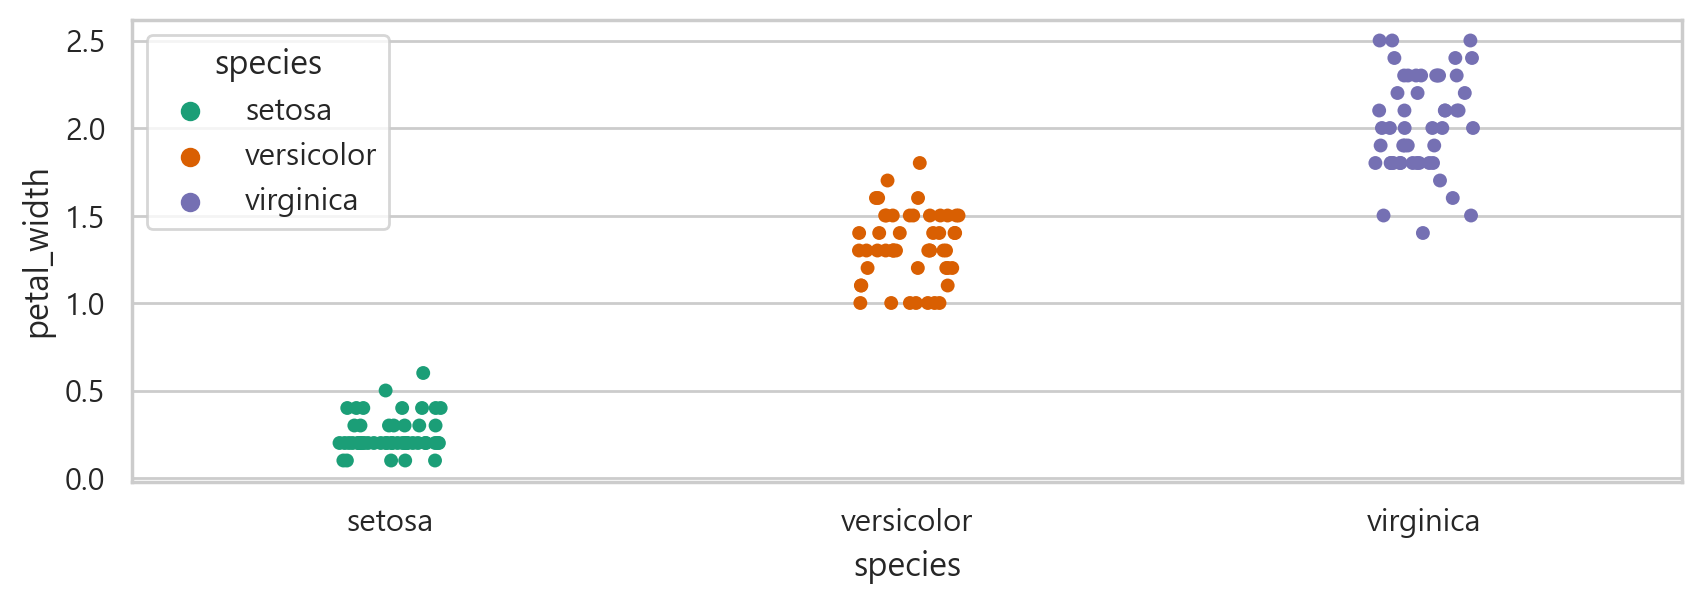

In [53]:
# x축이 범주형일 때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

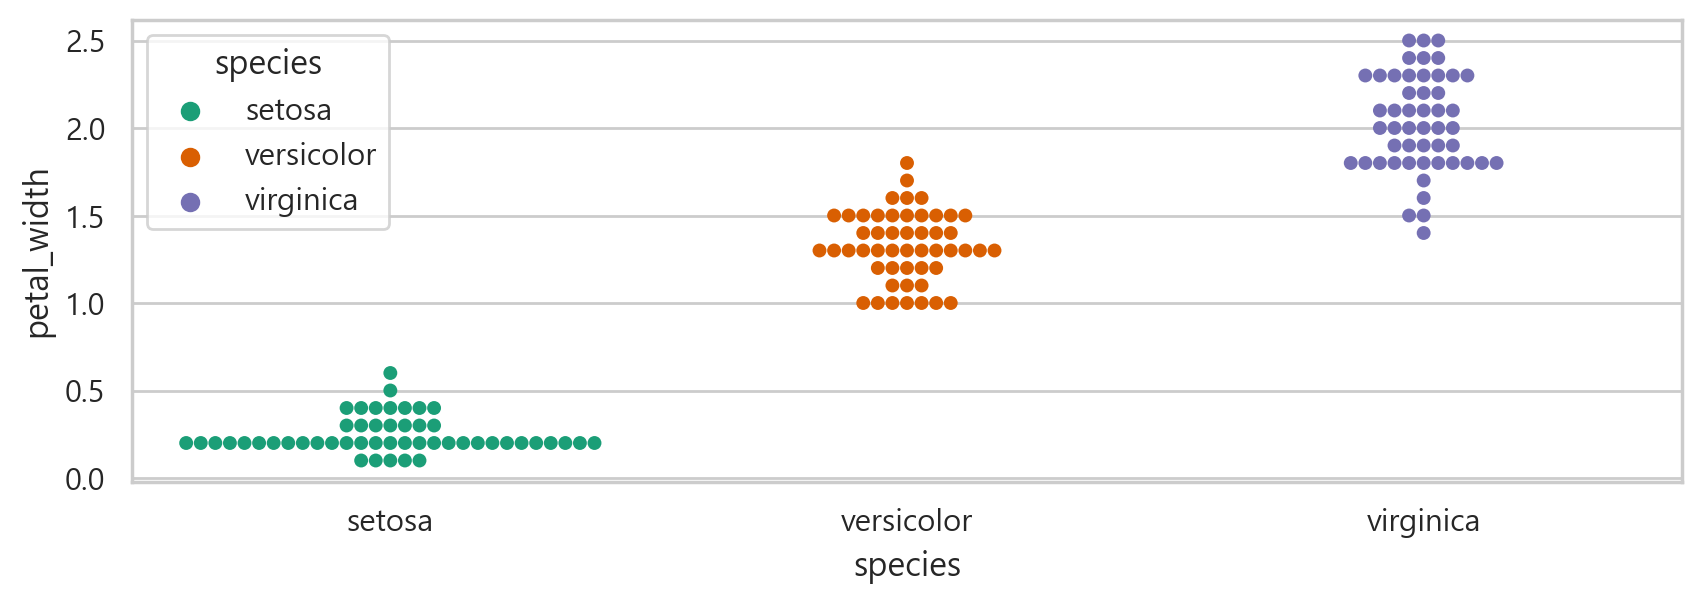

In [54]:
# x축이 범주형일 때의 산점도(분포 포함)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

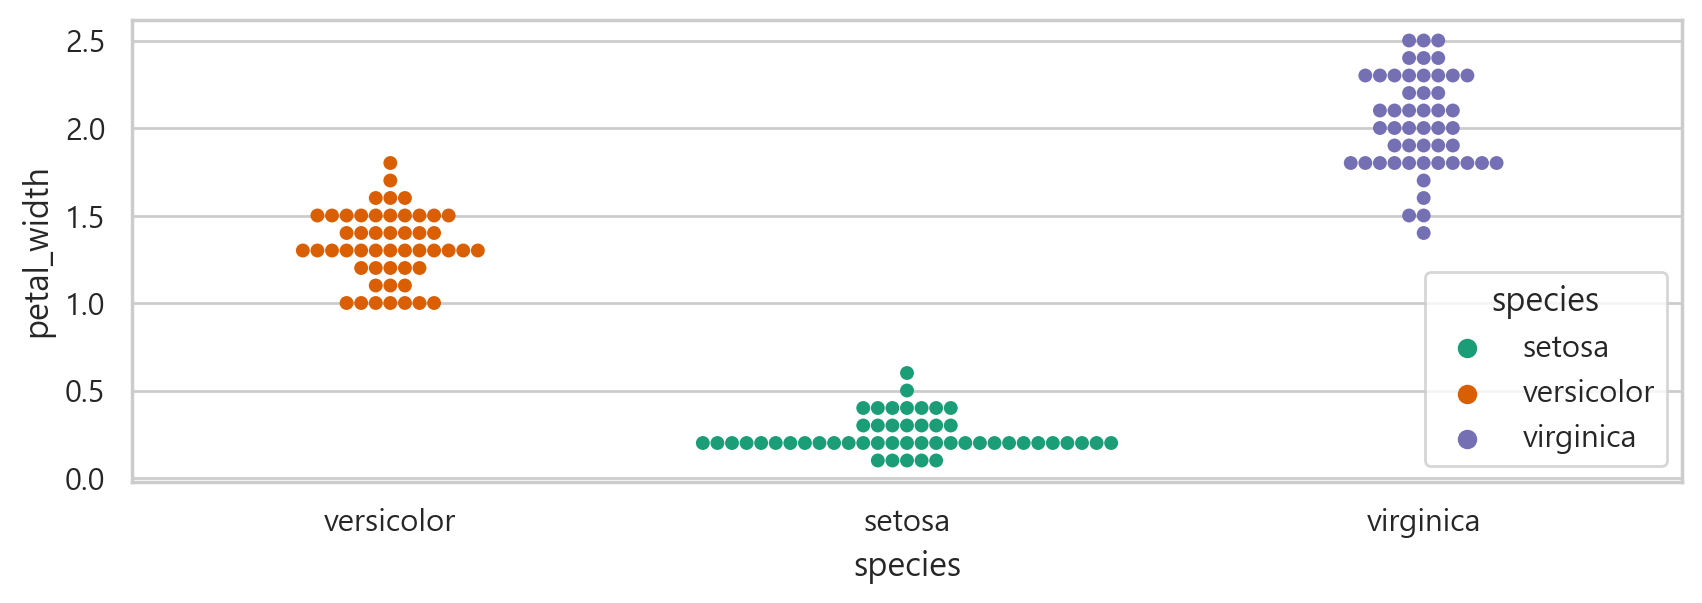

In [56]:
# 범주형 그래프의 x축을 지정하지 않으면
sns.swarmplot(data=iris,
              x='species',
              y='petal_width',
              hue='species',
              order=['versicolor','setosa','virginica'])
plt.show()

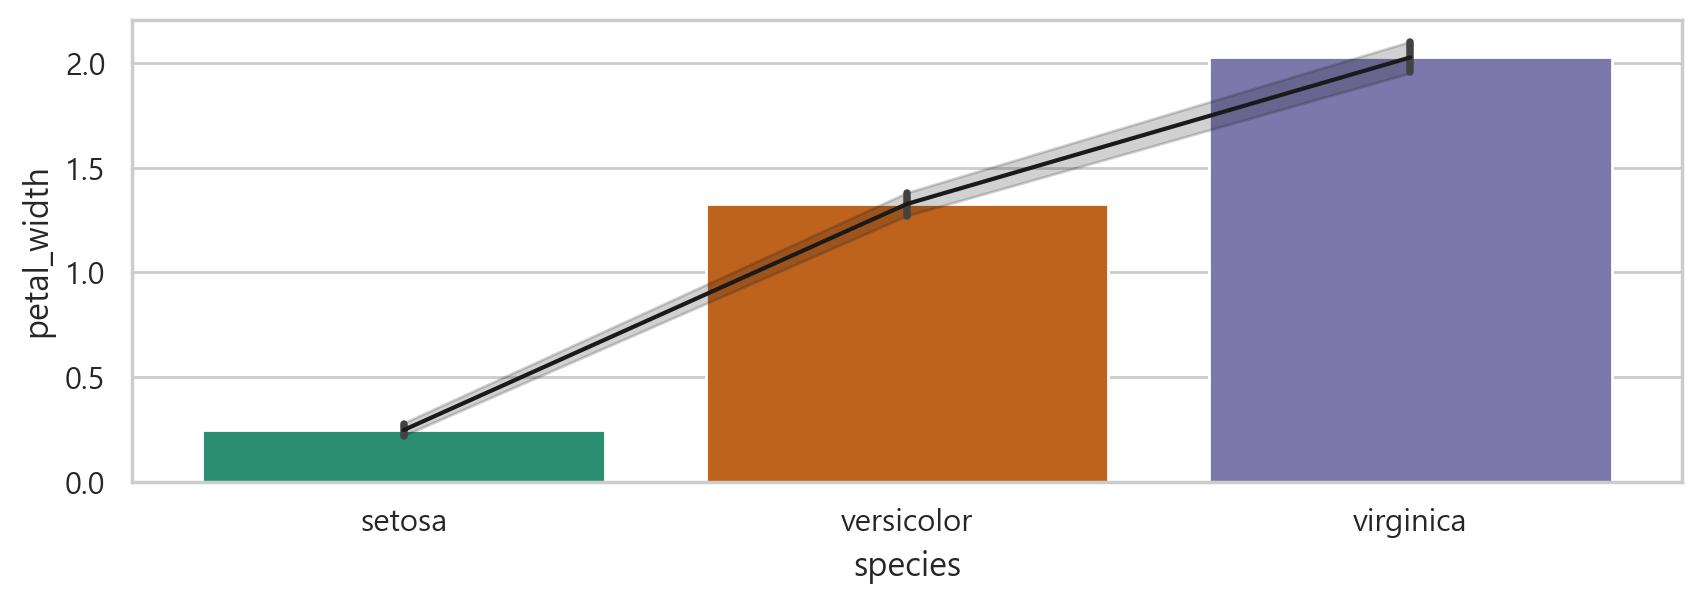

In [62]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과 그에 대한 신뢰구간
            # 신뢰구간 제외 : errorbar=None
sns.barplot(data=iris, x='species', y='petal_width',
           )#errorbar=None)
sns.lineplot(data=iris, x='species', y='petal_width', c='k')
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

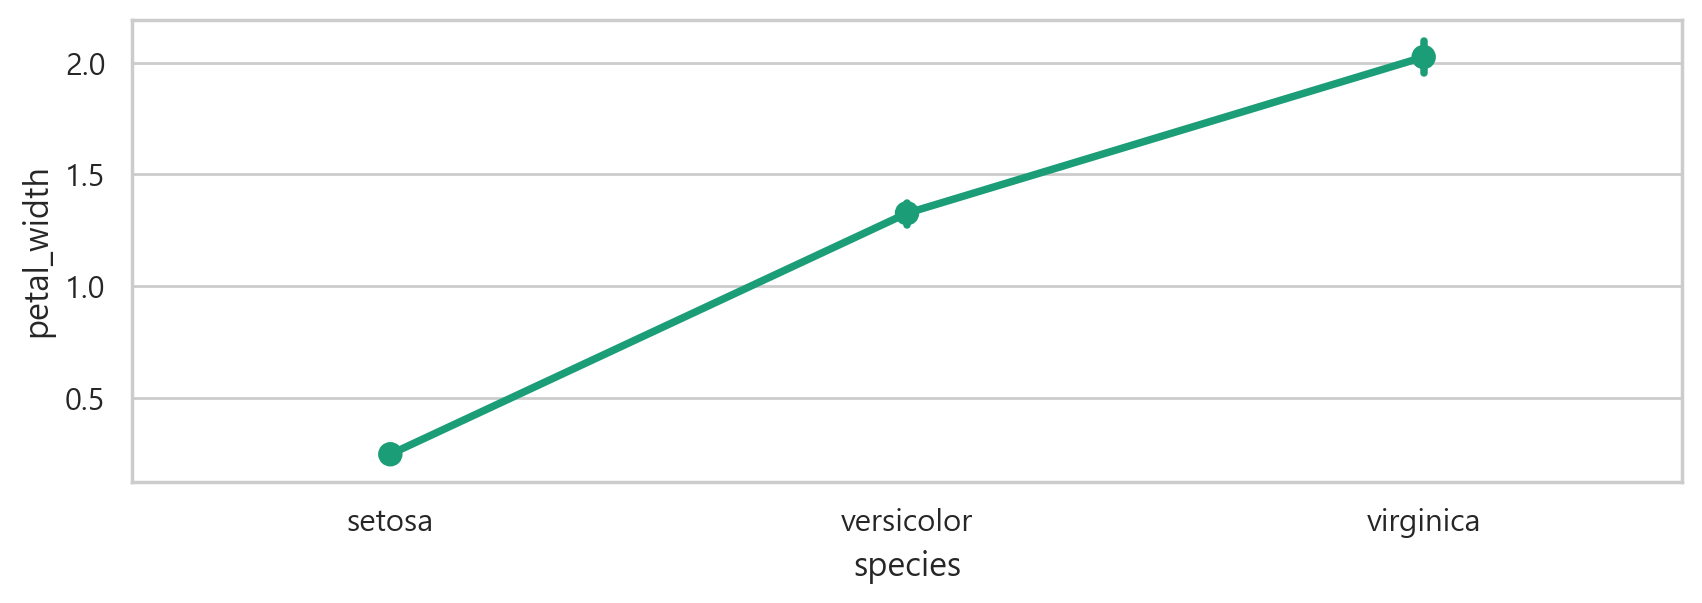

In [63]:
# 신뢰구간을 제외
sns.pointplot(data=iris, x='species', y='petal_width',
           )#errorbar=None)

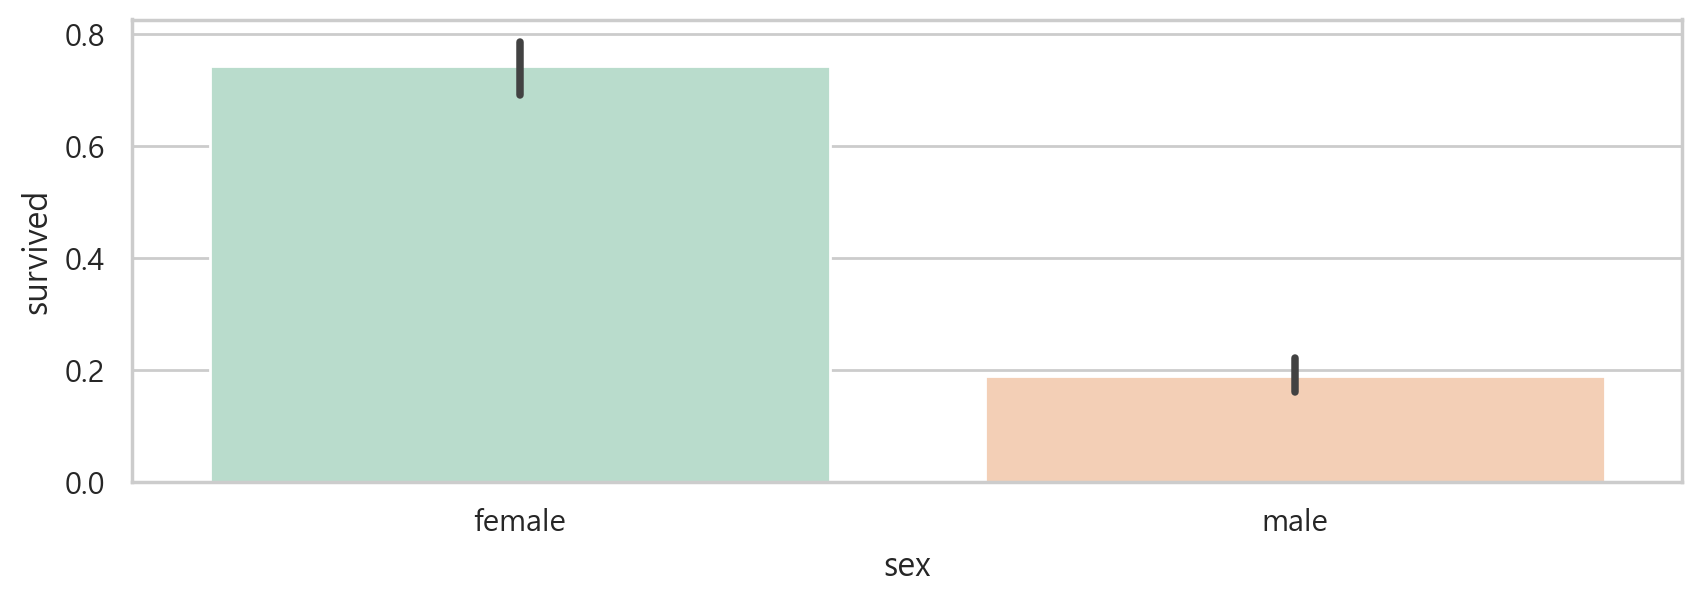

In [75]:
# 성별 생존율을 막대그래프 hue='class'
sns.barplot(data=titanic,
            x='sex',
            y='survived',
            order=['female','male'],
            palette='Pastel2')
plt.show()

#### titanic data

In [67]:
titanic.dtypes.head(3)

survived     int64
pclass       int64
sex         object
dtype: object

In [76]:
titanic.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [80]:
# 남자 중 비생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==0) ])

468

In [81]:
# 남자 중 생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==1) ])

109

In [83]:
# 여자 중 비생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==0) ])

81

In [82]:
# 여자 중 생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==1) ])

233

In [84]:
titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
746,0,3,male,16.0,1,1,20.25,S,Third,man,True,NaN,Southampton,no,False
818,0,3,male,43.0,0,0,6.45,S,Third,man,True,NaN,Southampton,no,True


In [85]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

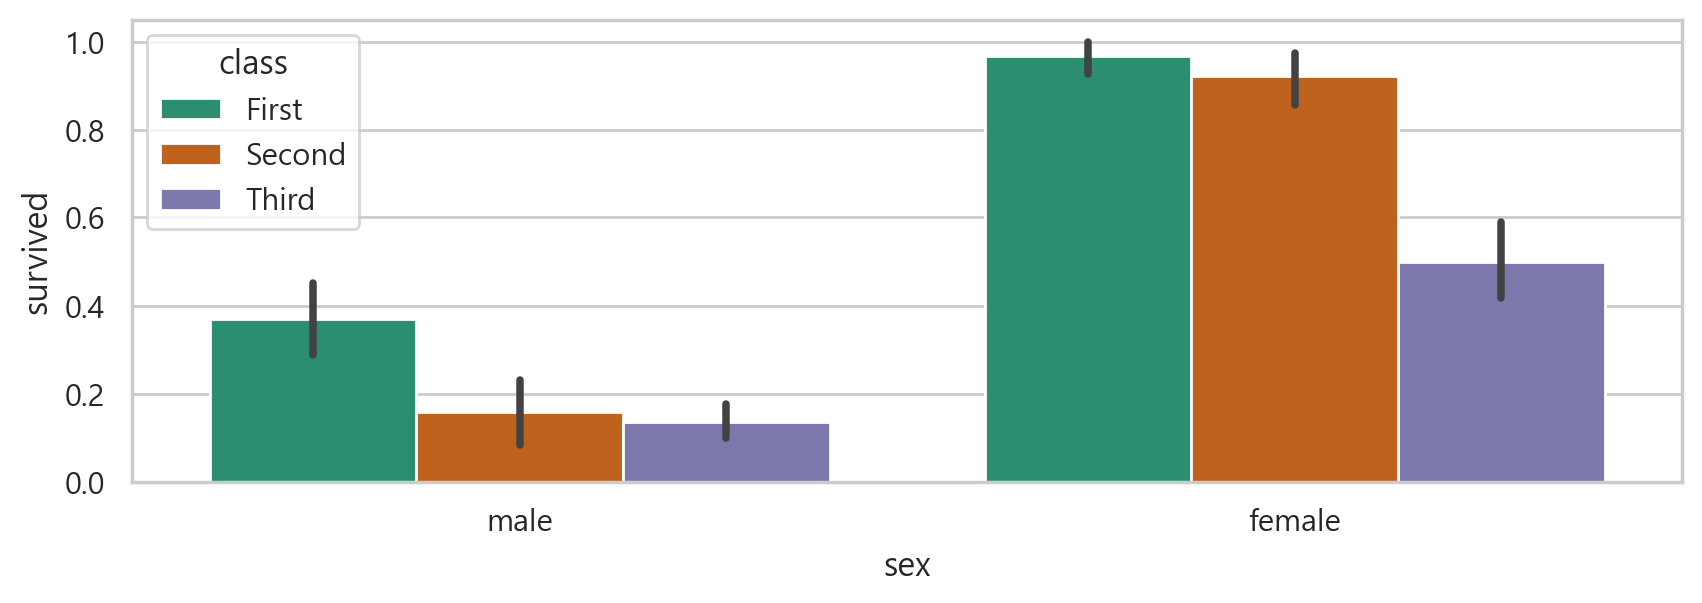

In [86]:
# class별 생존율 hue='class'
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

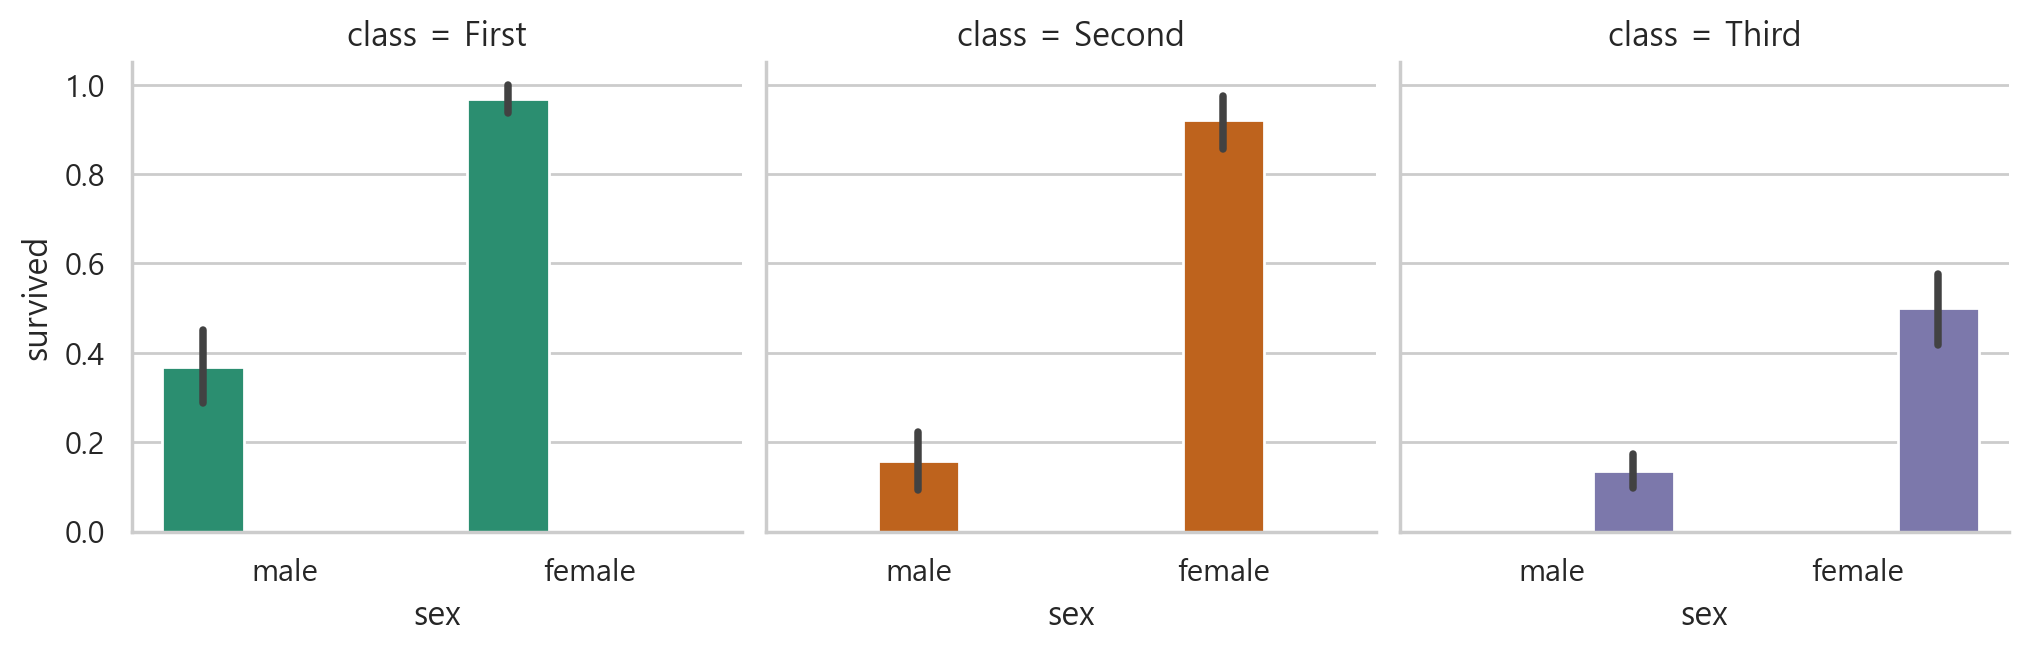

In [93]:
# class 별로 성별 생존률을 서브플롯(막대그래프)
g = sns.catplot(data=titanic,
            x='sex',
            y='survived',
            hue='class',
            kind='bar', # 기본값은 stipplot
            col='class',
            #col_wrap=2, # 한행에 그려질 서브플롯 갯수. 기본값은 n개
           )
g.fig.set_size_inches(10, 3)
plt.show()

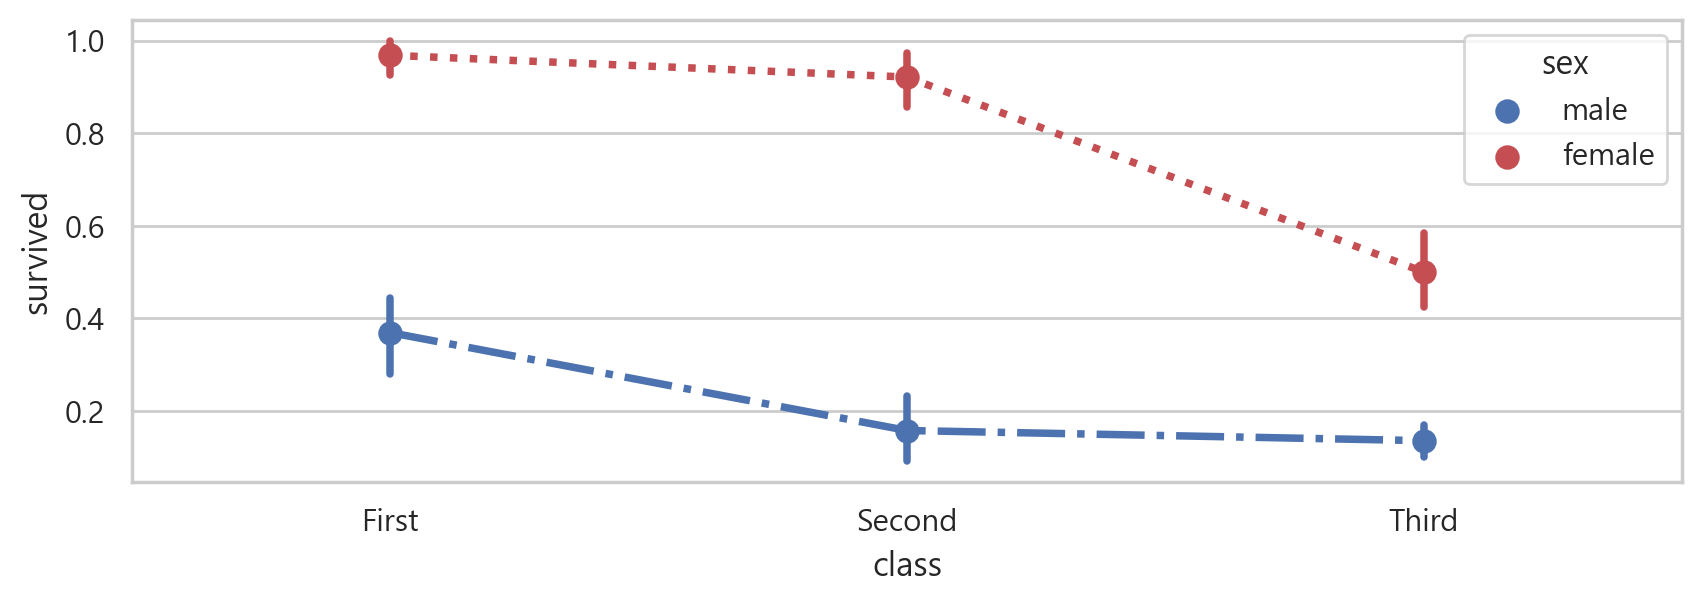

In [100]:
# 성별 생존율 hue='class'
sns.pointplot(data=titanic,
            x='class',
            y='survived',
            hue='sex',
            linestyles=['-.',':'],
            palette={'male':'b', 'female':'r'})
plt.show()

In [103]:
totallen = len(titanic)
nanlen = titanic.deck.isna().sum()
datalen = totallen - nanlen
print('deck 전체 데이터 갯수 : {}, 결측치 갯수 : {}, 데이터갯수 : {}'.format(totallen, nanlen, datalen))

deck 전체 데이터 갯수 : 891, 결측치 갯수 : 688, 데이터갯수 : 203


In [112]:
deckcnt = titanic.deck.value_counts() # 범주별 데이터 갯수()
deckcnt.index

CategoricalIndex(['C', 'B', 'D', 'E', 'A', 'F', 'G'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, dtype='category', name='deck')

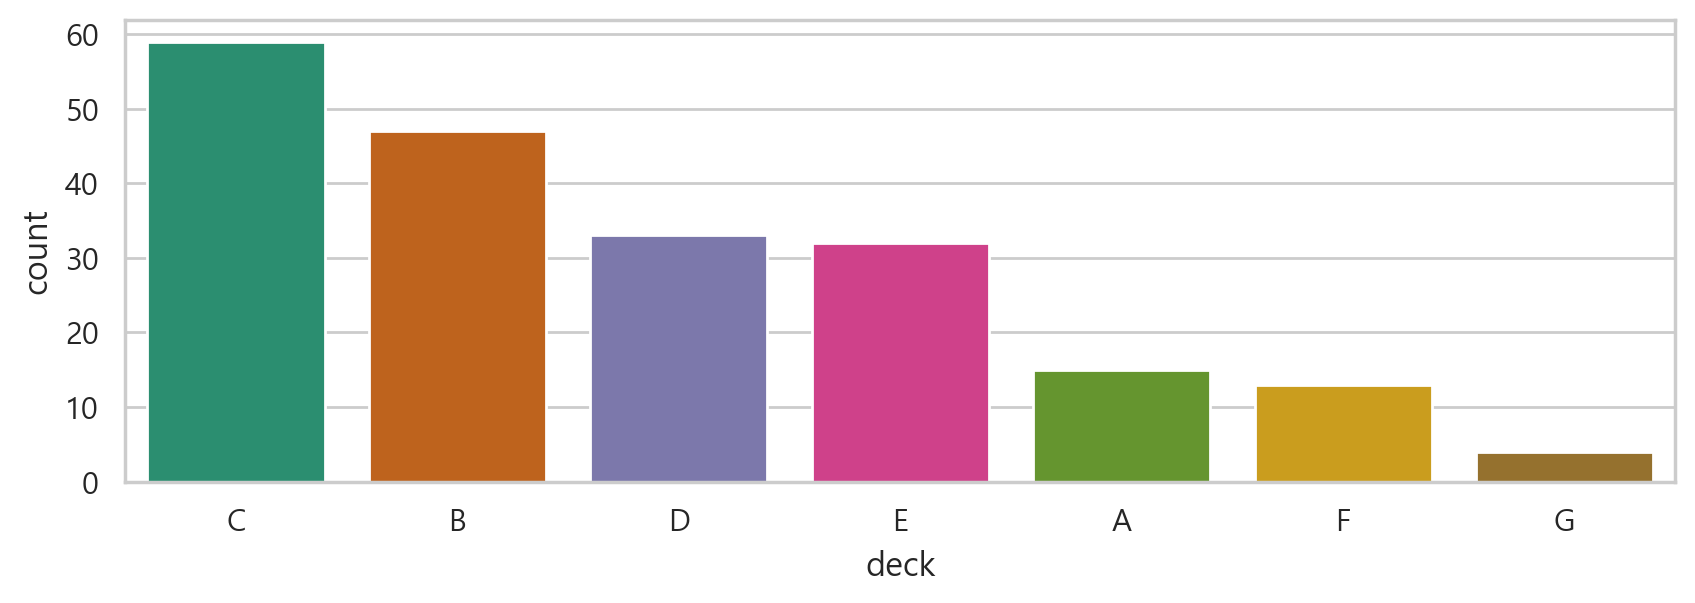

In [113]:
# deck별 갯수를 막대그래프(countplot)
sns.countplot(data=titanic,
              x='deck',
              order=deckcnt.index#order=['C','B','D','E','A','F','G'],
              )
plt.show()

In [109]:
titanic.groupby('deck').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
deck,,,,,,,,,,,,,,
A,15,15,15,12,15,15,15,15,15,15,15,15,15,15
B,47,47,47,45,47,47,47,45,47,47,47,45,47,47
C,59,59,59,51,59,59,59,59,59,59,59,59,59,59
D,33,33,33,31,33,33,33,33,33,33,33,33,33,33
E,32,32,32,30,32,32,32,32,32,32,32,32,32,32
F,13,13,13,11,13,13,13,13,13,13,13,13,13,13
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4


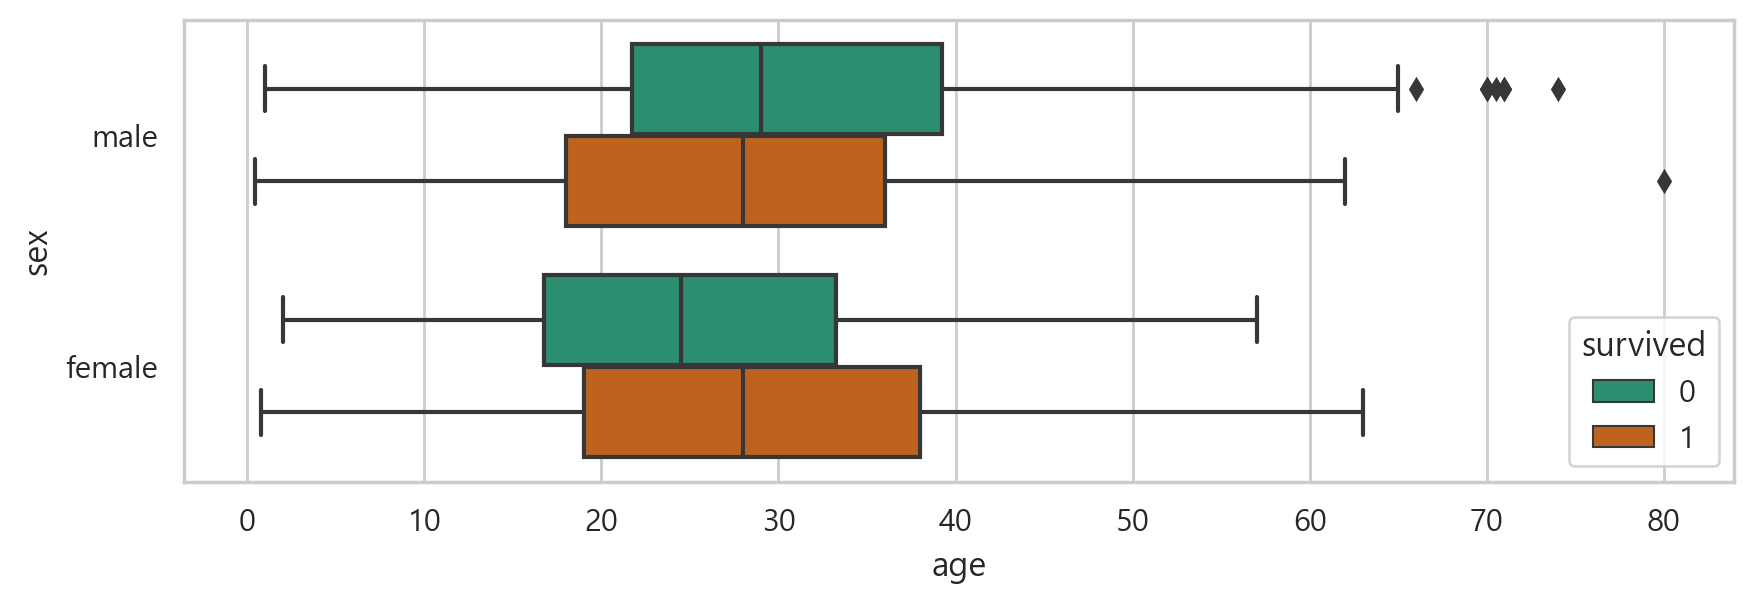

In [117]:
# boxplot
sns.boxplot(data=titanic, y='sex', x='age', hue='survived')
plt.show()

<Axes: xlabel='age', ylabel='sex'>

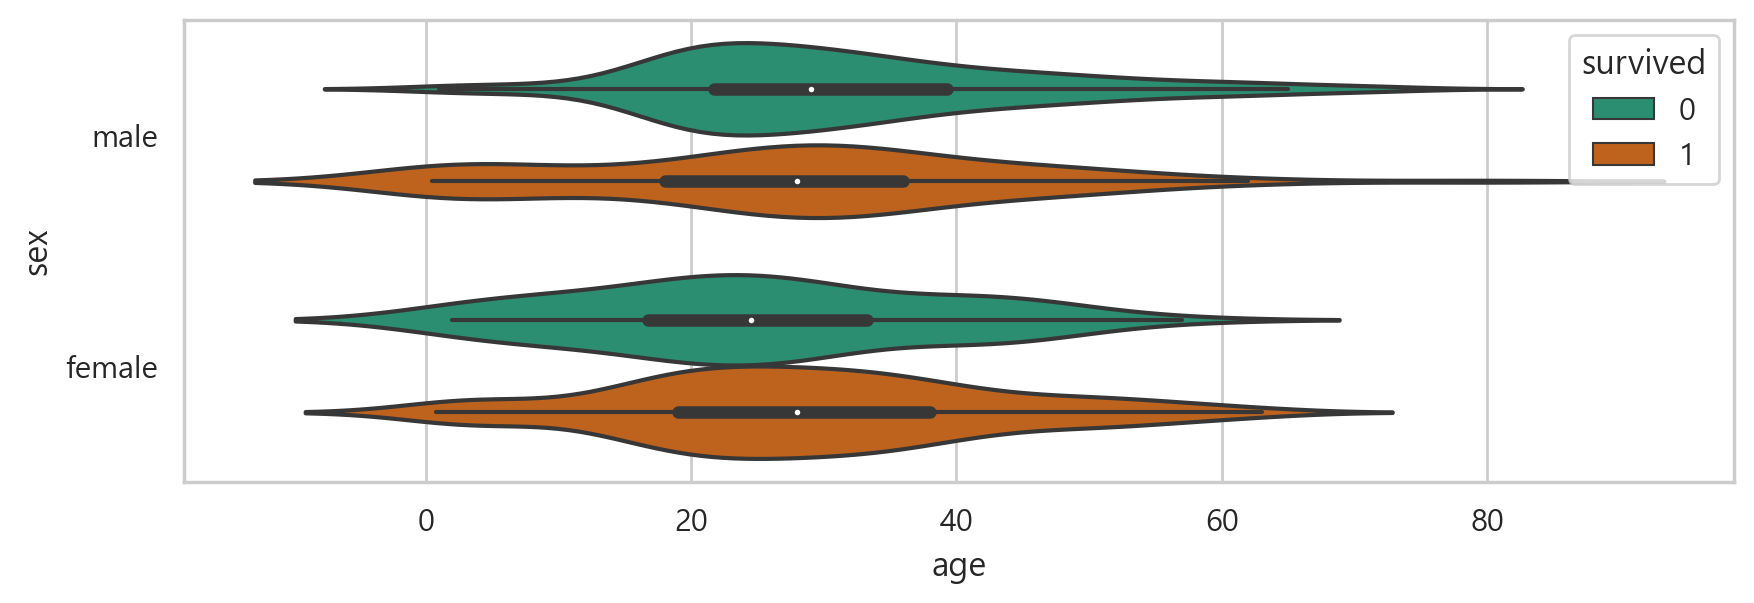

In [118]:
sns.violinplot(data=titanic, y='sex', x='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

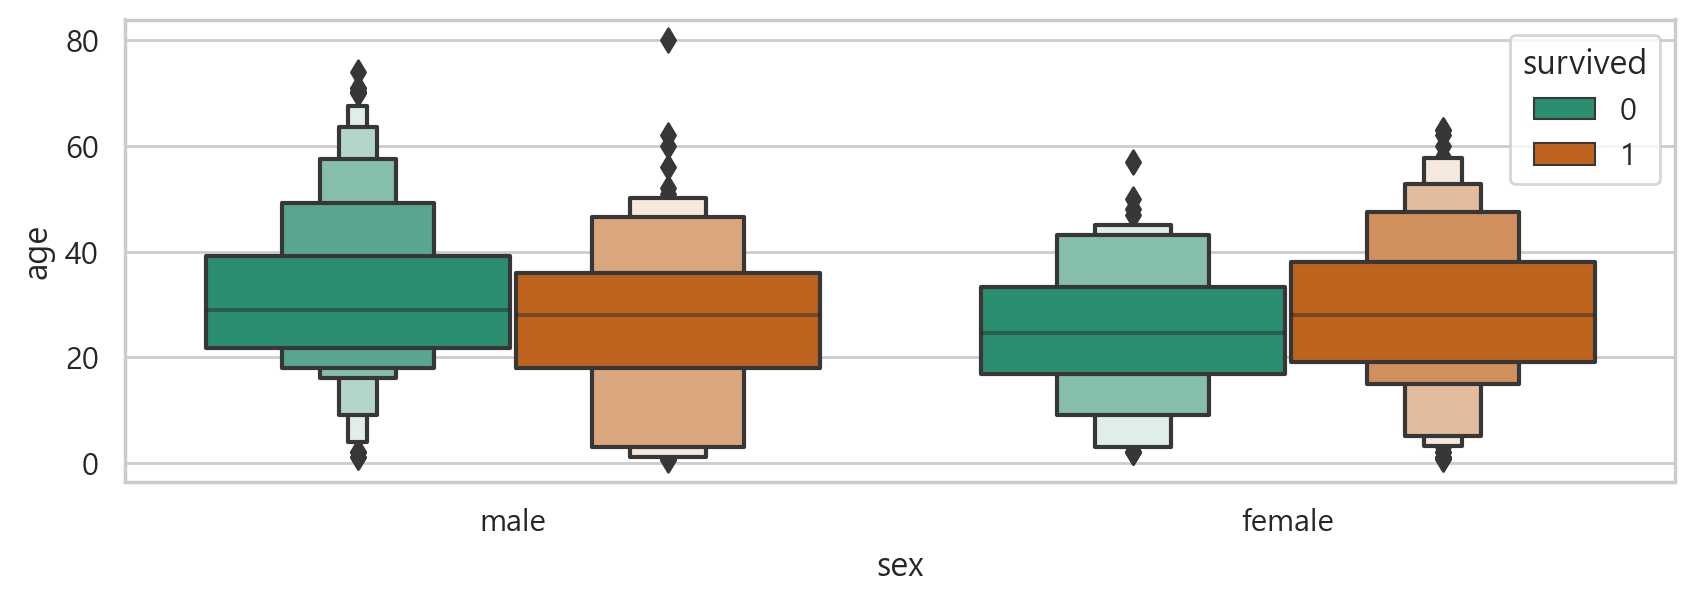

In [119]:
# boxenplot : box플롯 + 분포
sns.boxenplot(data=titanic, x='sex', y='age', hue='survived')

### 3) 쌍관계 그래프
- pairplot : 데이터 프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatterplot)와 히스토그램

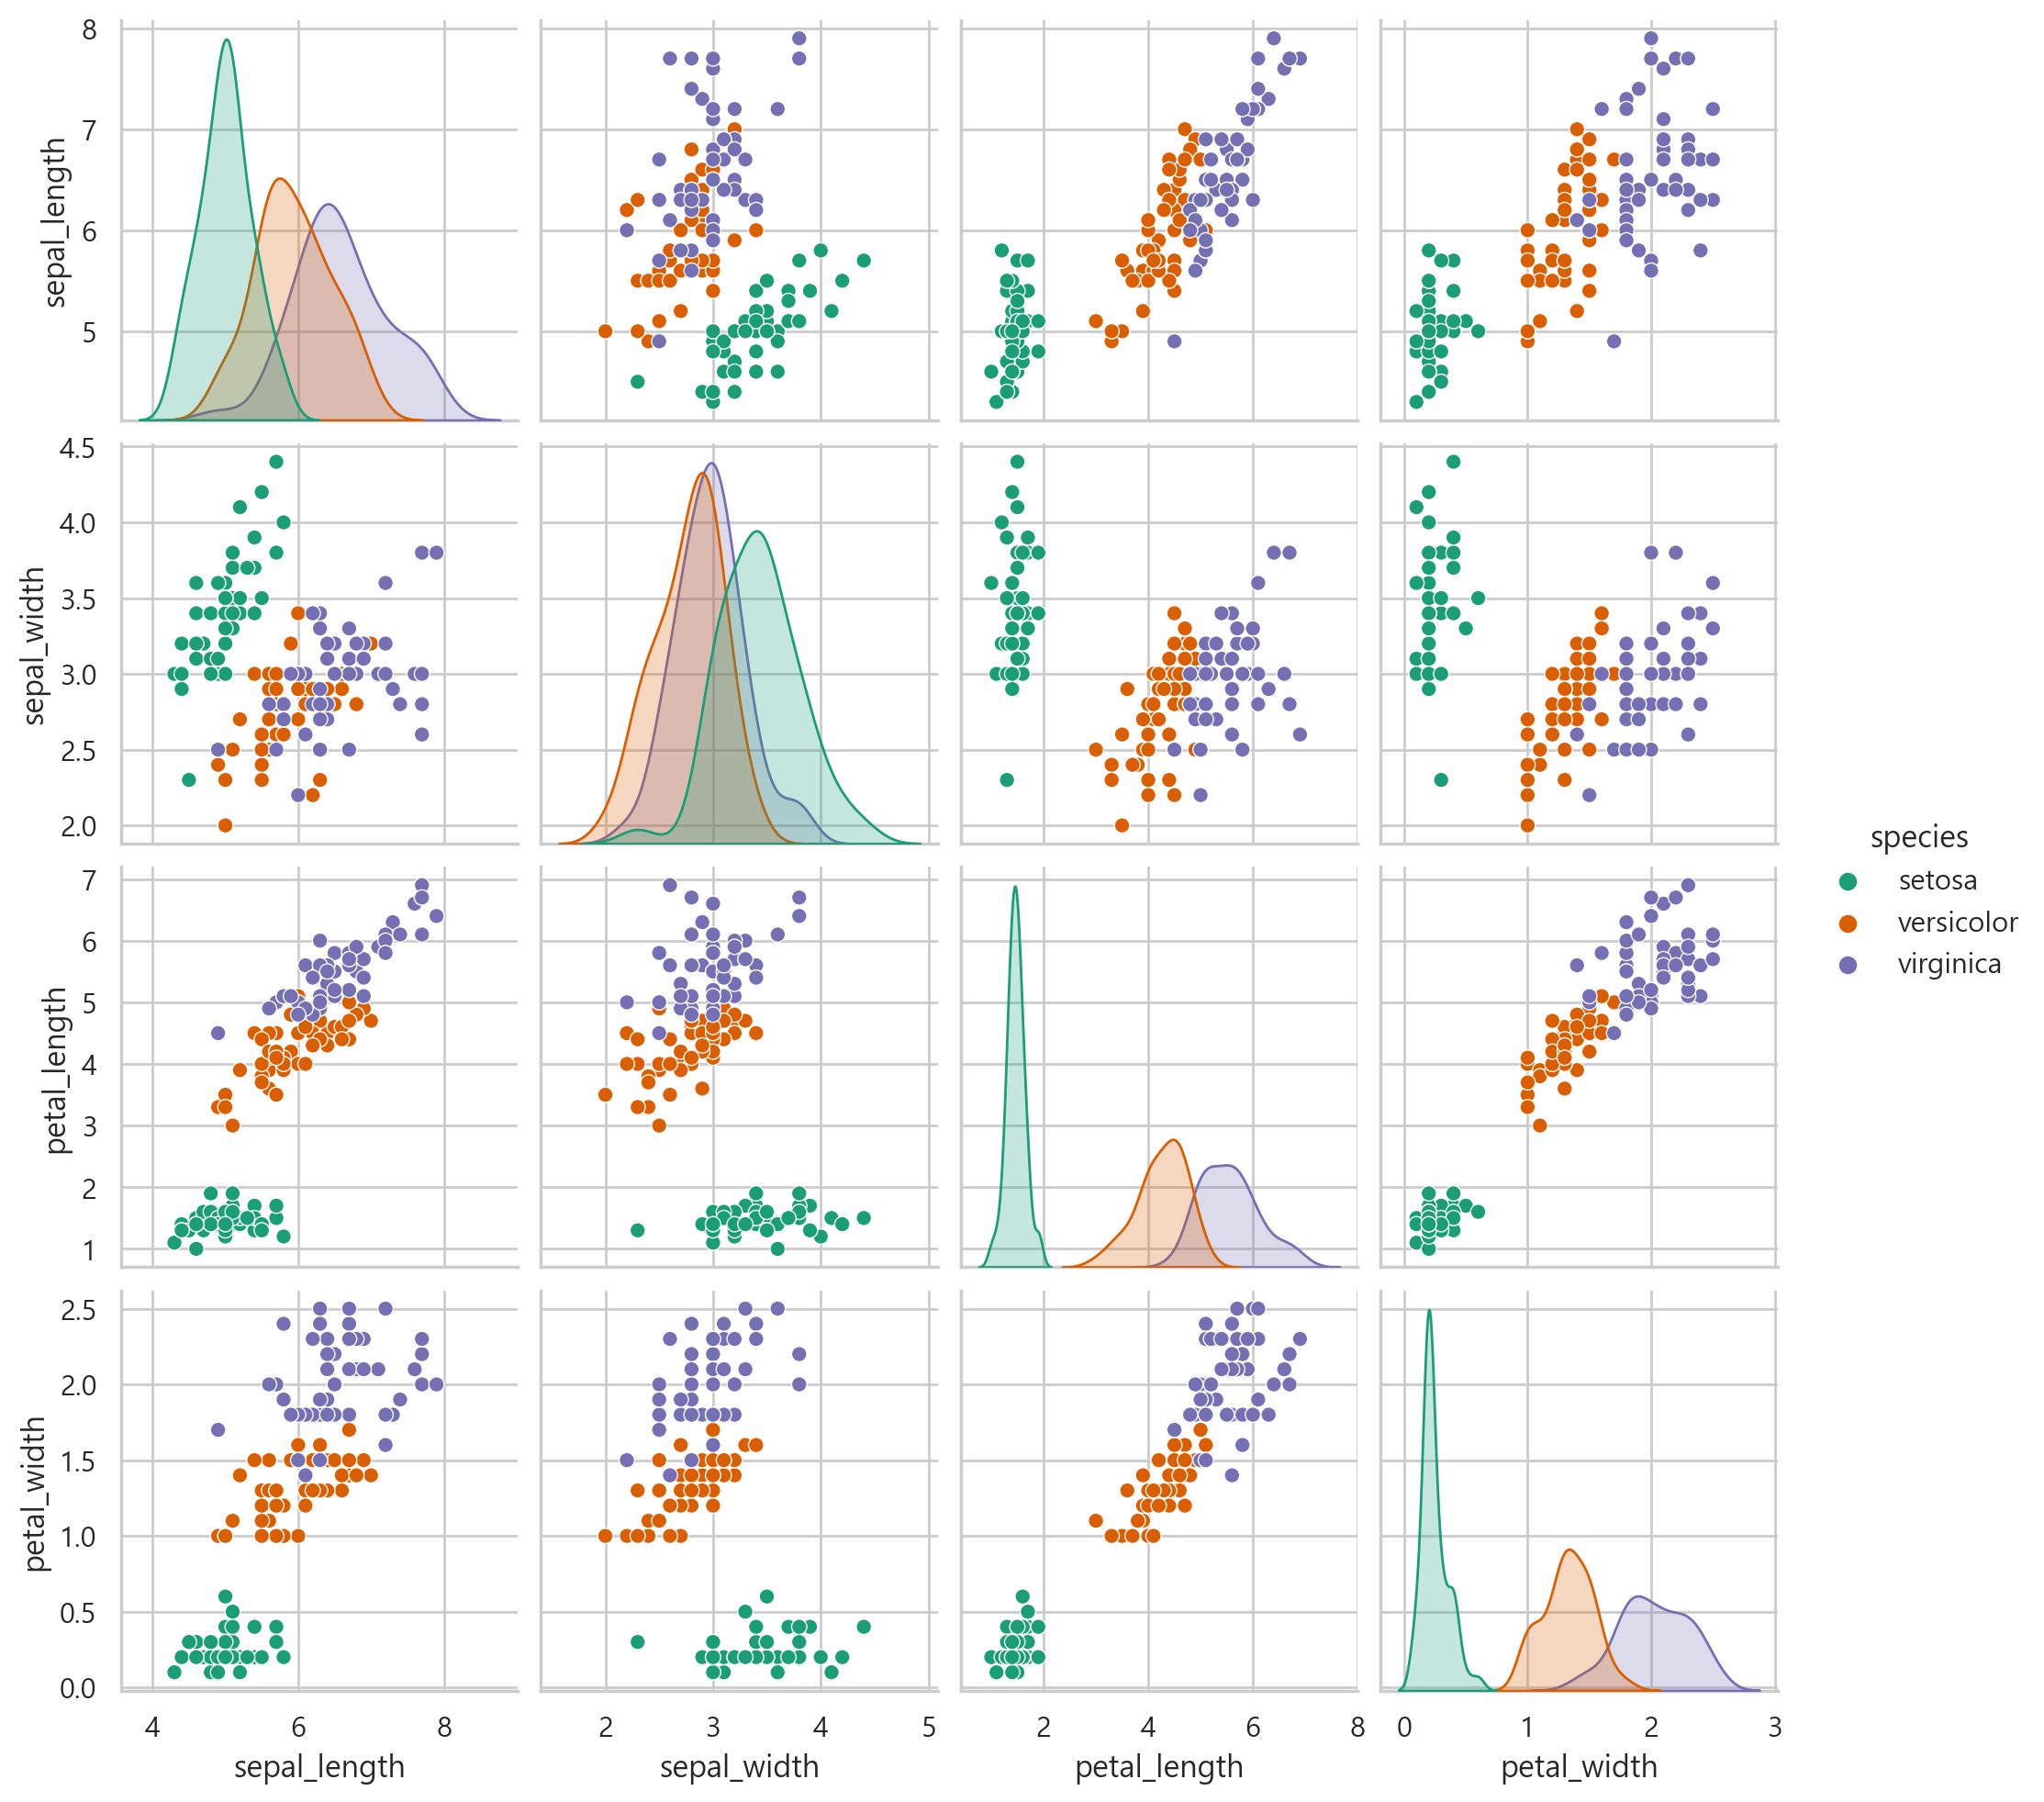

In [121]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도 그래프(도수분포표)
- histplot, displot

In [129]:
import numpy as np
x = np.random.randn(10000) # 평균이 0이고 표준편차가 1인 정규분포로 10000개인 1차원 배열 생성
x

array([ 1.56246319, -1.03554688,  0.14842474, ...,  0.45475302,
       -0.34849286, -0.5991895 ])

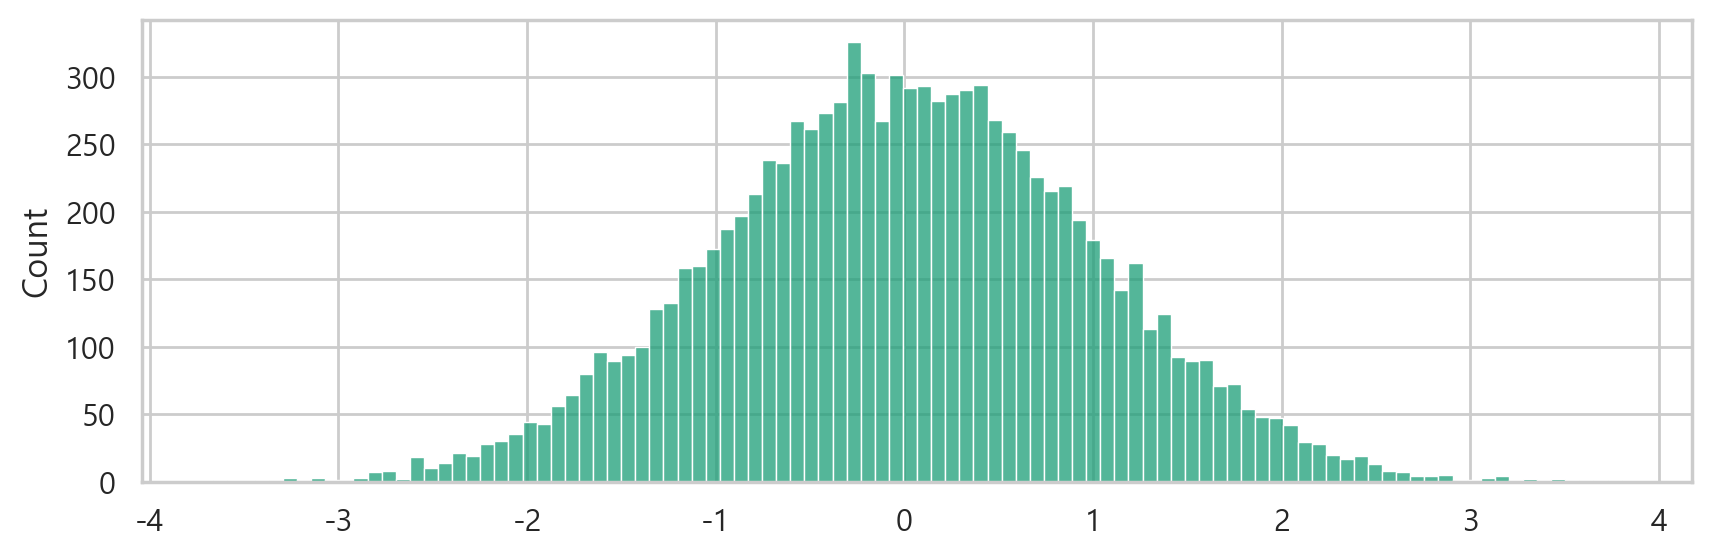

In [132]:
sns.histplot(x, bins=100) # kde=False 그래프를 매끄럽게
plt.show()

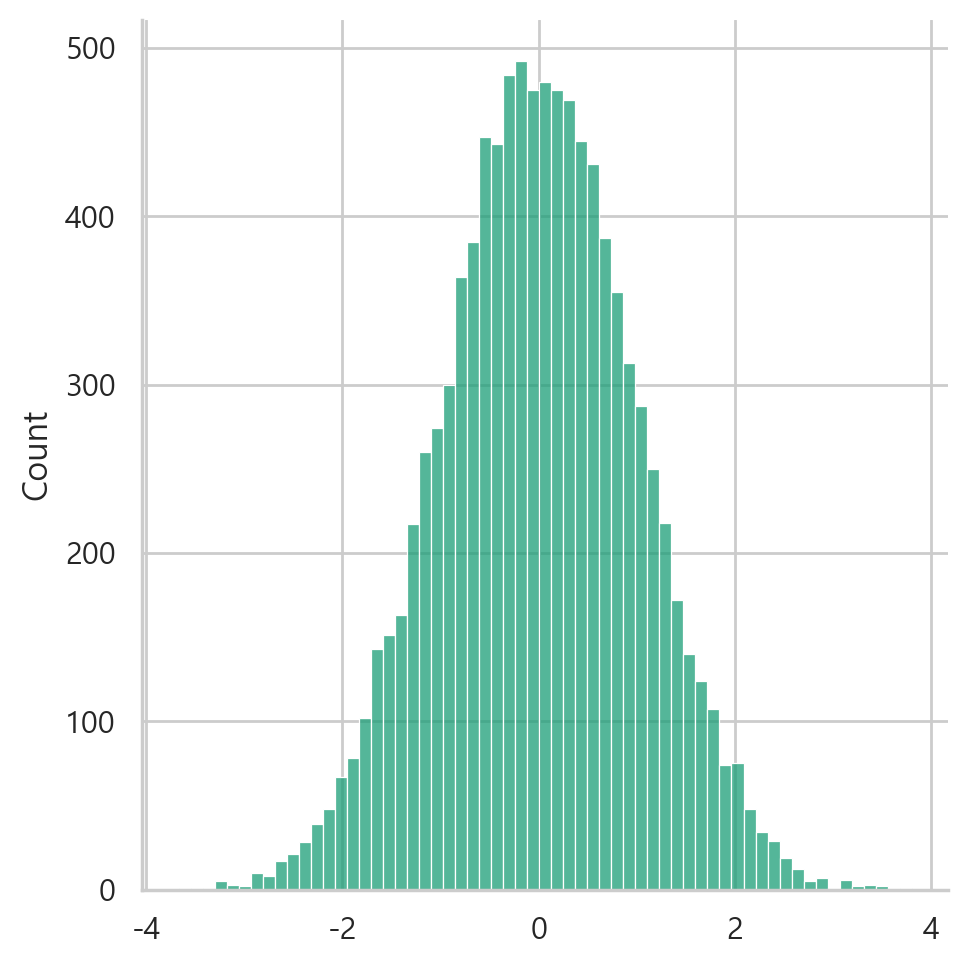

In [133]:
sns.displot(x)

### 5) 회기 그래프
- regplot => lmplot(서브플롯)

In [134]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


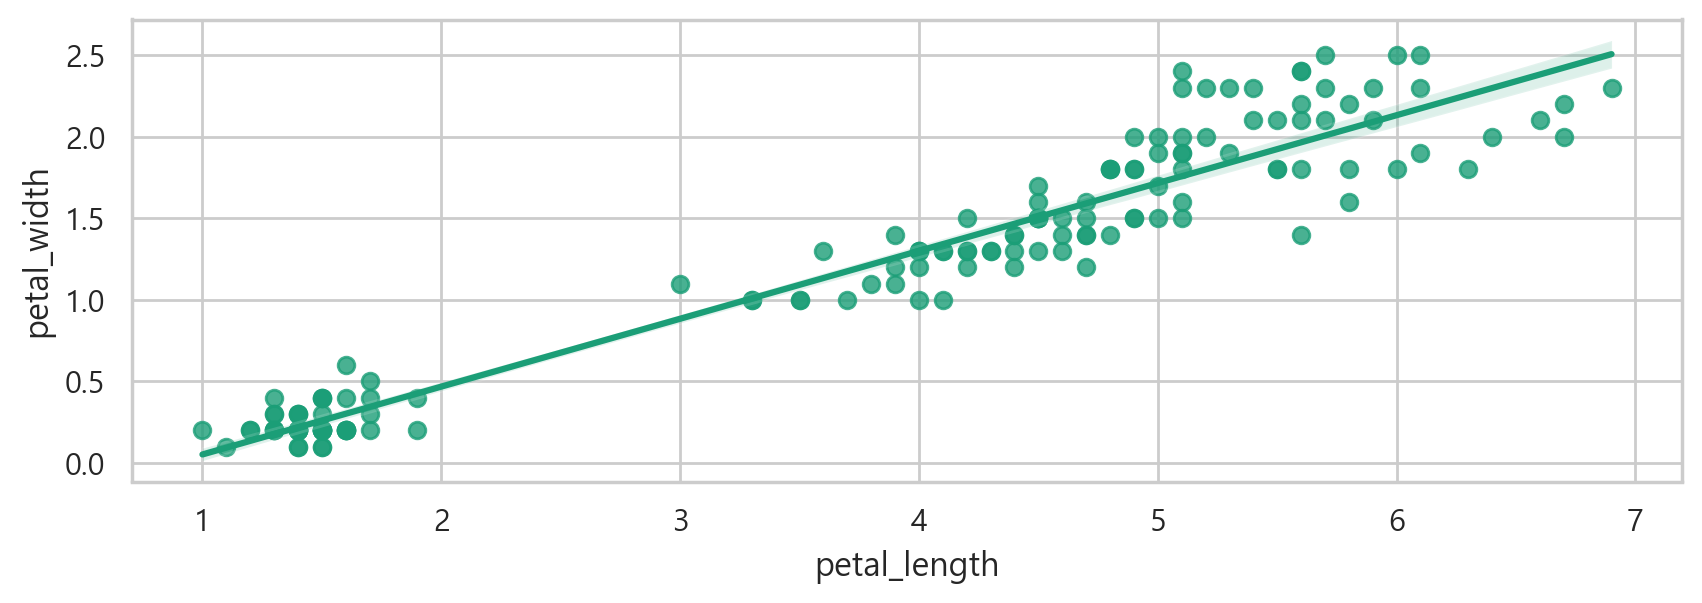

In [135]:
# 회귀 그래프 : regplot(hue 사용 불가), lmplot(hue 사용 가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

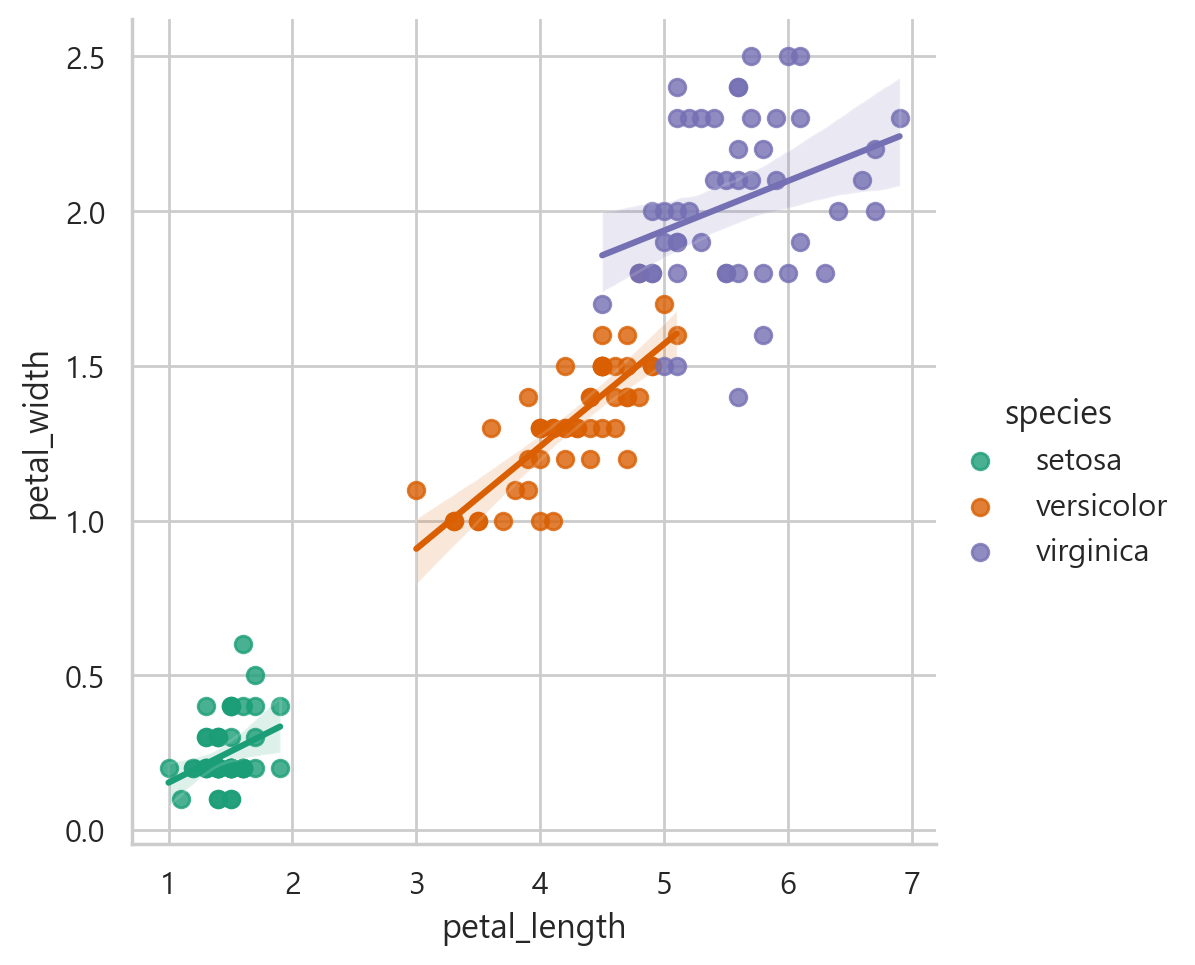

In [136]:
# 종별 회귀 그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species',
           #col='species', 
          )
plt.show()

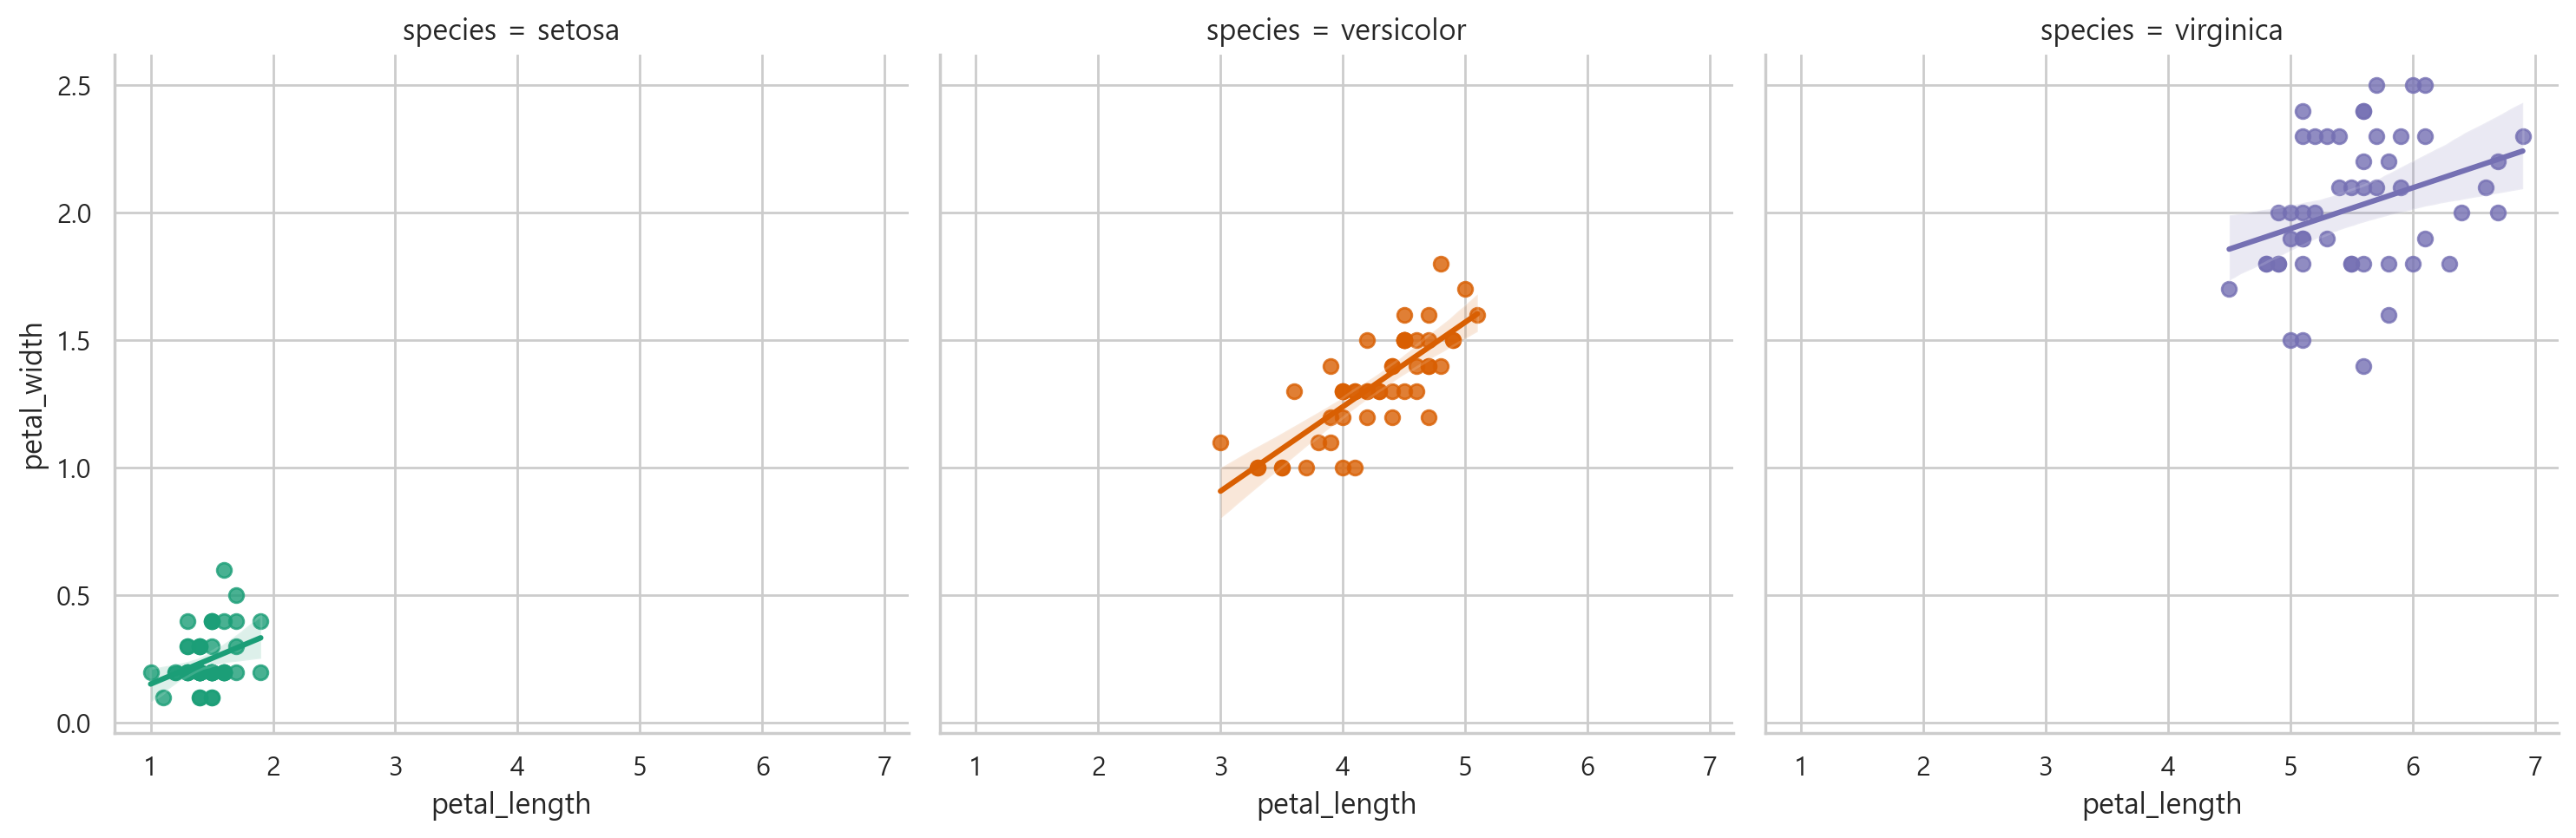

In [137]:
# 종별 회귀 그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width', hue='species',
           col='species', #col을 하지말아야 hue 사용 가능
          )
plt.show()

## 2.4 다중 그래프를 위한 FacetGrid
- 교안84page : https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples

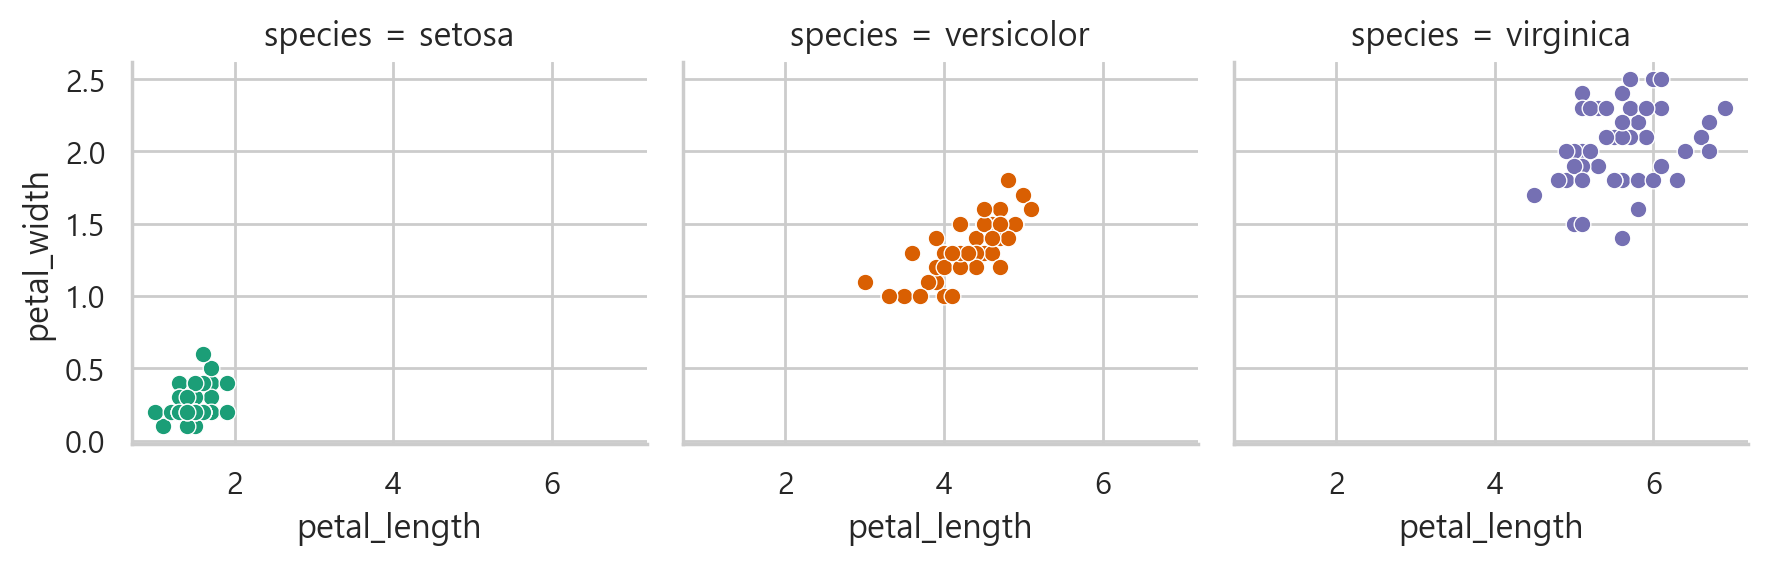

In [139]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

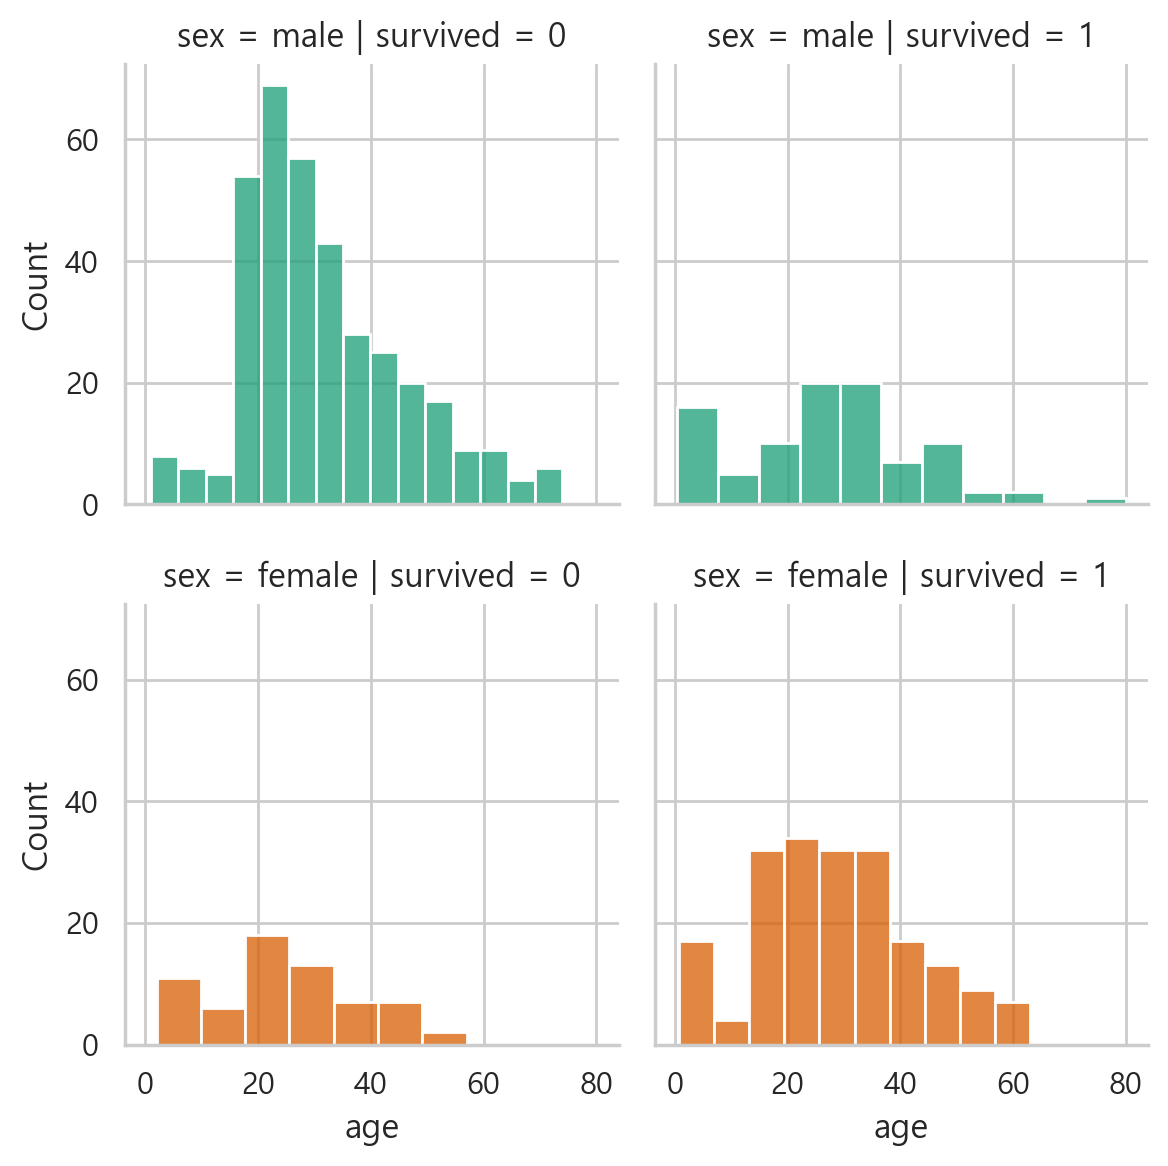

In [142]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(sns.histplot, 'age')
plt.show()